In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from itertools import chain, combinations, permutations
from skmultilearn.problem_transform import LabelPowerset
from sklearn.dummy import DummyClassifier
from collections import OrderedDict

In [3]:
features = pd.read_csv('../data/features_plus_descriptions.csv')
features.set_index('Feature Type and Number', inplace=True)

H_Best = ['H0_Best', 'H1_Best', 'H2_Best', 'H3_Best', 'H4_Best', 'H5_Best']

In [12]:
df = pd.read_csv('../data/multiclass_LP_transfomed_raw_data.csv')
y_tol = df[H_Best]
y_classes = df['y']
X_tol = df.drop(H_Best + ['y'], axis=1)

In [13]:
df2 = pd.read_csv('../data/multiclass_raw_data.csv')
X_orig = df2.drop(H_Best + ['Best Heuristic'], axis=1)
y_orig = df2['Best Heuristic']
X_orig.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.0,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797


In [14]:
def get_unique_combos(X, y):
    lp = LabelPowerset()
    y_t = lp.transform(y)
    return lp.unique_combinations_

def print_mapping(dictionary):
    for key in dictionary.keys():
        print('{} : {}'.format(key, dictionary[key]))
        
def str_keys_to_list(string):
    return [int(num) for num in string.split(',')]

In [15]:
unique_tol = get_unique_combos(X_tol, y_tol)
print_mapping(unique_tol)


0 : 0
1,2,4,5 : 1
3 : 2
4,5 : 3
2,3 : 4
5 : 5
1,3 : 6
1,2,3,4,5 : 7
2 : 8
2,3,5 : 9
1,2,3 : 10
3,5 : 11
2,3,4,5 : 12
1,3,4,5 : 13
1 : 14
4 : 15
1,4,5 : 16
1,3,5 : 17
2,4,5 : 18
3,4,5 : 19
1,4 : 20
1,5 : 21
1,2 : 22
2,4 : 23
1,2,4 : 24
1,3,4 : 25
1,2,3,4 : 26
2,5 : 27
2,3,4 : 28
3,4 : 29
1,2,3,5 : 30
1,2,5 : 31


In [20]:
def get_powerset_counts(target, powerset):
    store_counts = {combo: 0 for combo in powerset.keys()}
    for combo in powerset.keys():
        int_list = str_keys_to_list(combo)
        pattern = np.zeros(6,dtype=int)
        for i in int_list:
            pattern[i] = 1
        for a in range(len(target)):
            if np.array_equal(target[a], pattern):
                store_counts[combo] += 1
    return store_counts

In [21]:
arr_y_tol = np.array(y_tol)
counts_tol = get_powerset_counts(arr_y_tol, unique_tol)

sorted_counts_tol = OrderedDict(sorted(counts_tol.items(), key= lambda k: k[1]))
counts_tol_df = pd.DataFrame(sorted_counts_tol.values(), index=sorted_counts_tol.keys(), columns=['tol-count'])
print(counts_tol_df)

           tol-count
1,2,3,5            7
1,2,5              7
2,5                9
2,3,4             10
3,4               10
1,3,4             12
2,3,5             15
2,4,5             15
1,5               21
1,2,3             22
2,4               25
1,2,3,4           29
1,3,5             35
3,4,5             39
2,3,4,5           41
1,2               45
2,3               48
1,3               54
1,2,4,5           68
1,2,4             76
1,4               85
3,5              103
1,4,5            117
4,5              133
1,3,4,5          145
2                242
4                360
1,2,3,4,5        382
5                421
1                463
3                525
0               2554


In [22]:
omap = {'0': 2554, '1': 1089, '3': 748, '4': 617, '2': 486, '5': 624}

col = [omap['0'], omap['3'], omap['1'], omap['5'], 0, omap['4'], omap['2'] ] + [0] * 25
col = col[::-1]
print(col)
column_to_add = pd.Series(col, index=counts_tol_df.index)
counts_tol_df['orig-count'] = column_to_add

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 486, 617, 0, 624, 1089, 748, 2554]


In [23]:
counts_tol_df_sort = counts_tol_df.sort_values(by=['orig-count', 'tol-count'], axis=0)
counts_tol_df_sort

,tol-count,orig-count
"1,2,3,5",7,0
"1,2,5",7,0
"2,5",9,0
"2,3,4",10,0
"3,4",10,0
"1,3,4",12,0
"2,3,5",15,0
"2,4,5",15,0
"1,5",21,0
"1,2,3",22,0


In [24]:
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(30,0), 
                    textcoords="offset points",clip_on=True,
                    ha='right', va='center', fontsize=9)

In [25]:
#vals_to_plot =  counts_tol_df.loc[counts_tol_df['tol'] > 30, :]
#start_index = 12

vals_to_plot = counts_tol_df_sort
start_index = 26
print(vals_to_plot)



           tol-count  orig-count
1,2,3,5            7           0
1,2,5              7           0
2,5                9           0
2,3,4             10           0
3,4               10           0
1,3,4             12           0
2,3,5             15           0
2,4,5             15           0
1,5               21           0
1,2,3             22           0
2,4               25           0
1,2,3,4           29           0
1,3,5             35           0
3,4,5             39           0
2,3,4,5           41           0
1,2               45           0
2,3               48           0
1,3               54           0
1,2,4,5           68           0
1,2,4             76           0
1,4               85           0
3,5              103           0
1,4,5            117           0
4,5              133           0
1,3,4,5          145           0
1,2,3,4,5        382           0
2                242         486
4                360         617
5                421         624
3         

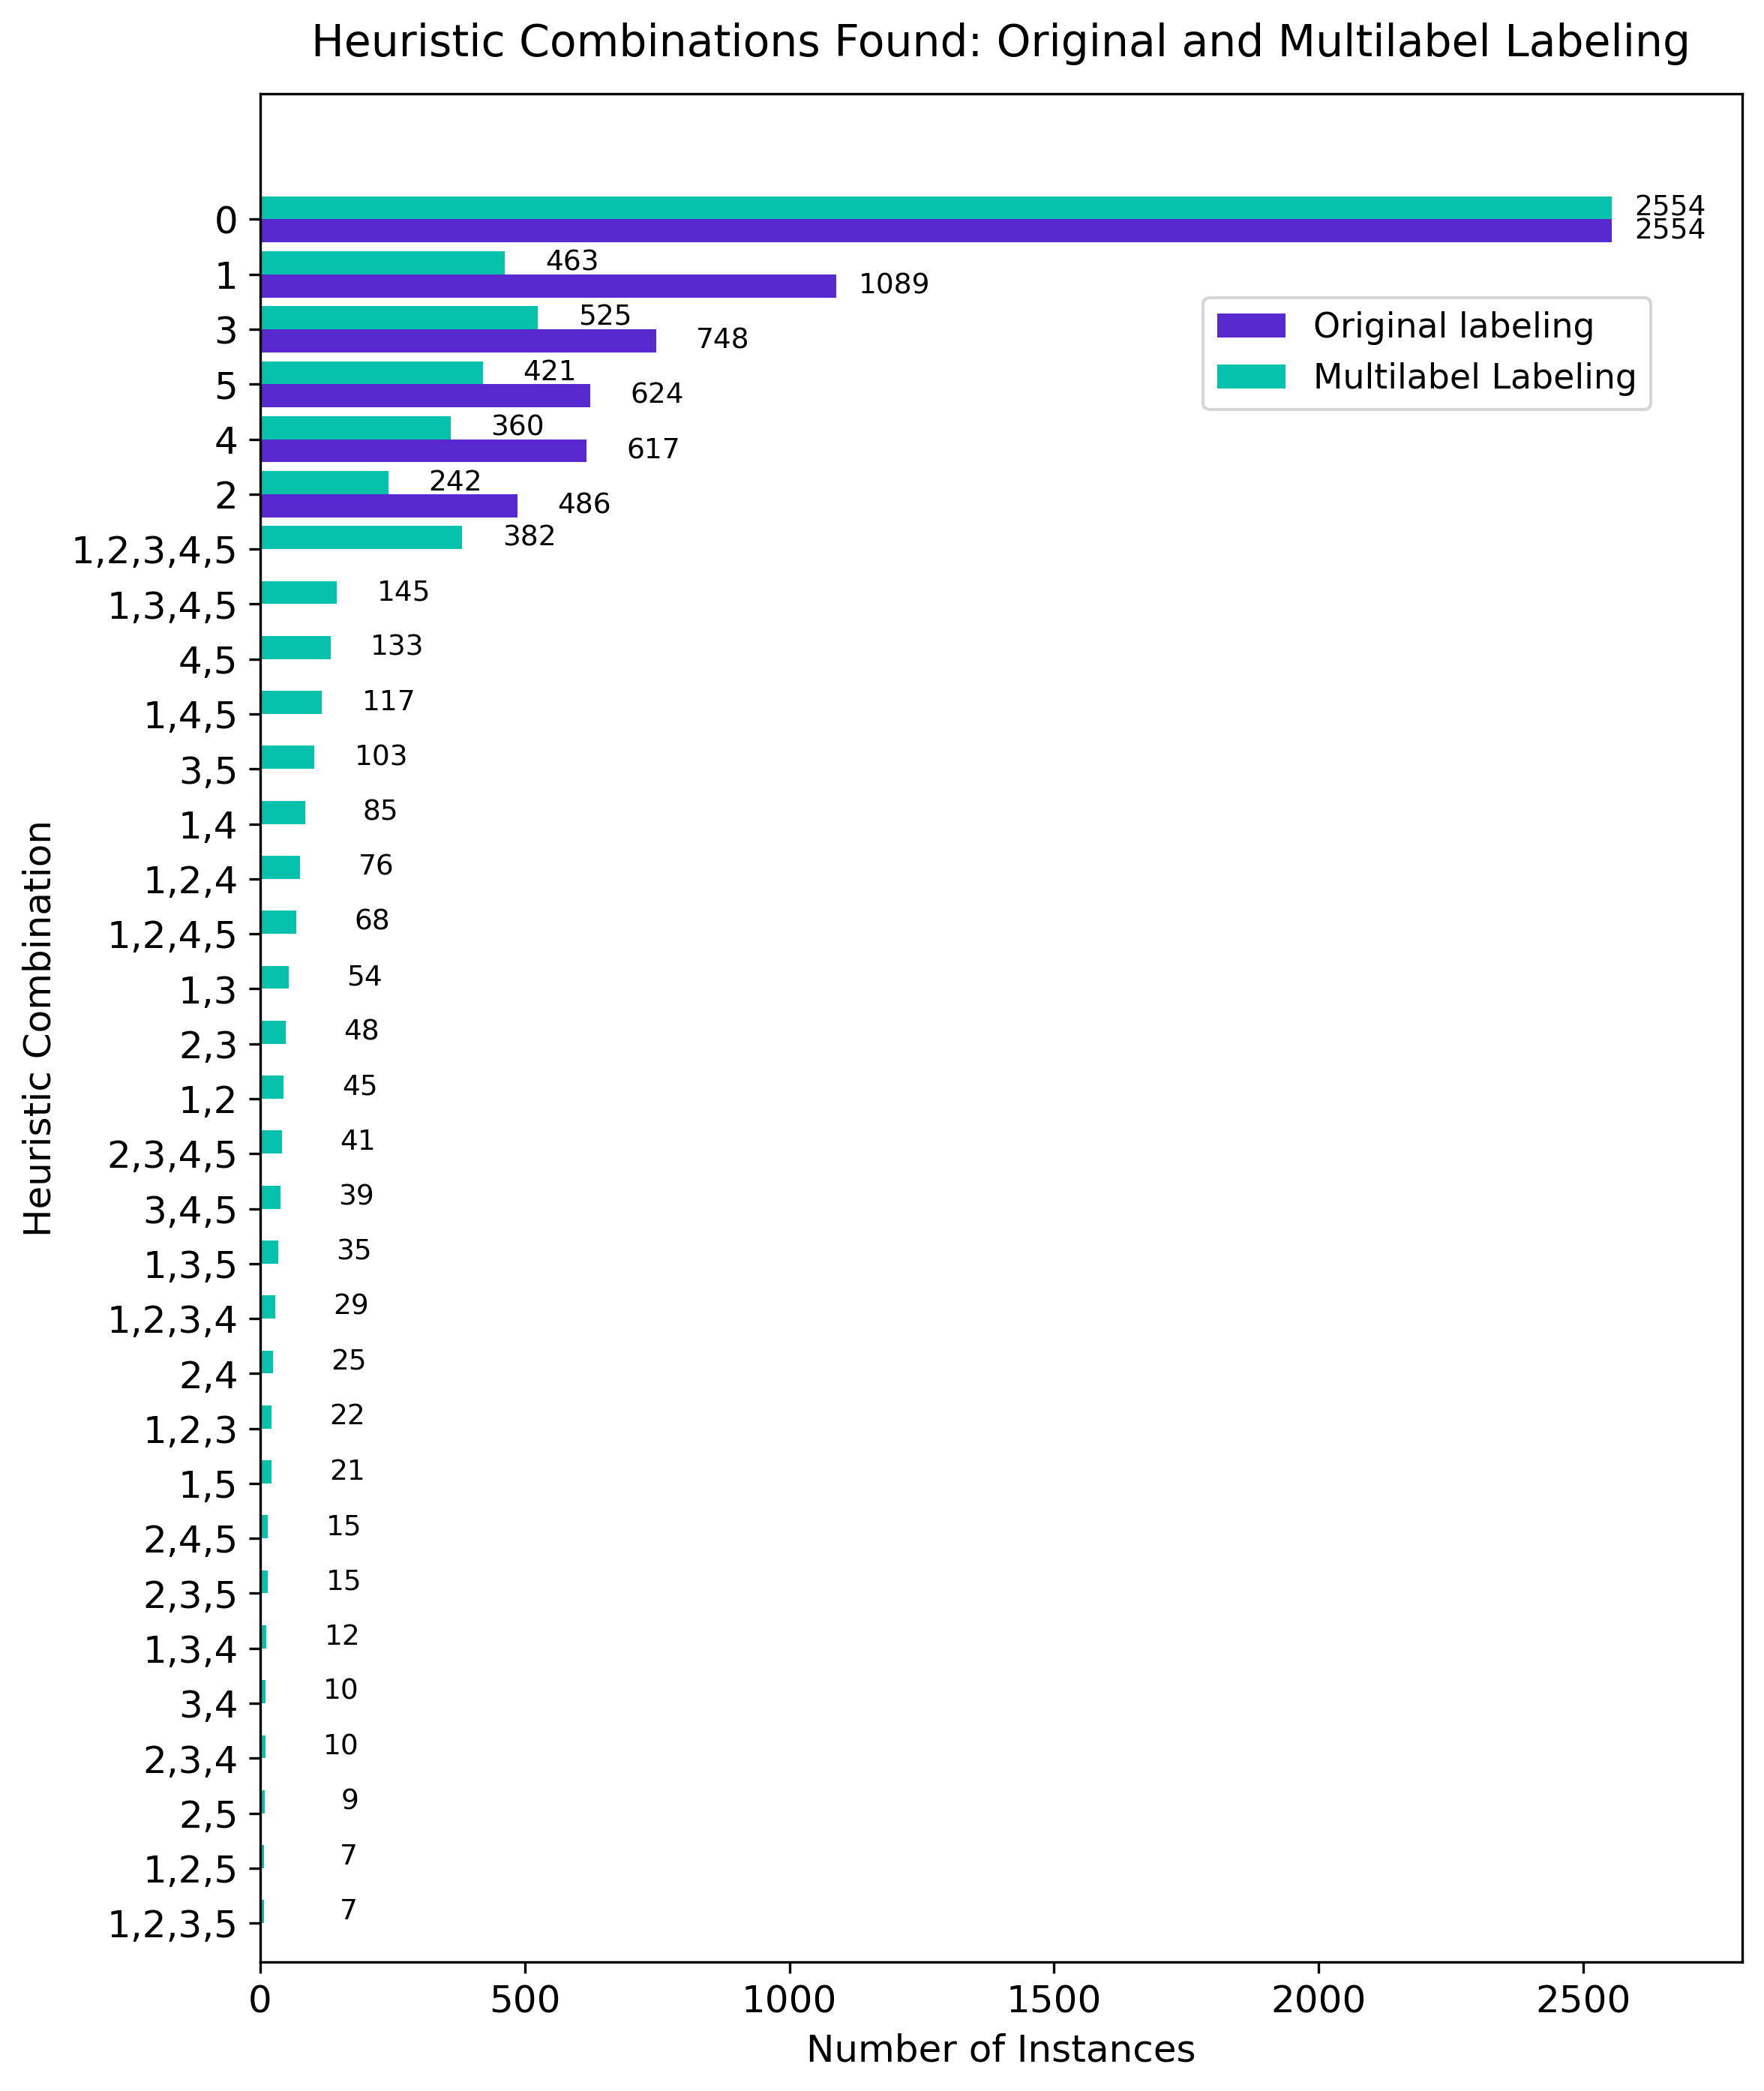

In [26]:
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 300
fig,ax = plt.subplots(figsize=(8.5,11))
ind = np.arange(vals_to_plot['orig-count'].values.shape[0])
width=0.42

rects1 = ax.barh(ind, vals_to_plot['orig-count'].values, width, label='Original labeling', color = ['xkcd:blue purple'])
rects2 = ax.barh(ind+width, vals_to_plot['tol-count'].values, width, label='Multilabel Labeling', color=['xkcd:turquoise'])
plt.yticks(ind+width/2, vals_to_plot.index, fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 2800)
plt.ylim(-0.5, 33.5)
autolabel(rects1[start_index:])
autolabel(rects2)
plt.legend(bbox_to_anchor=(0.95, 0.9))

plt.xlabel("Number of Instances", fontsize=12)
plt.ylabel("Heuristic Combination", fontsize=12)
ttl = plt.title("Heuristic Combinations Found: Original and Multilabel Labeling", fontsize=14)
ttl.set_position([.5, 1.01])
plt.savefig("../figures/heuristic_labeling_modified.png", dpi = 300)
plt.show()

In [38]:
static_feats = ['S' + str(i) for i in range(1,15)] + ['y']
print(static_feats)
df_static = df[static_feats]
df_static.head()

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'y']


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,y
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,6,3.0487,52,15.796,1
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0


In [ ]:
#pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, s=20, alpha=.1)

In [ ]:
groups = df_static.groupby("y")

for name, group in groups:


In [43]:
df_grouped = df_static.groupby('y')
df_grouped.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,y
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,6,3.0487,52,15.796,1
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,6,3.0487,52,15.796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,0.25000,0.81250,0.25000,0.18750,0,0.37500,0.062500,0.56250,4,2.3750,3,2.2368,37,17.750,31
4791,0.23894,0.85841,0.10619,0.21239,0,0.29203,0.079646,0.62832,5,2.0885,25,3.3559,678,35.071,31
4868,0.31250,0.87500,0.12500,0.25000,0,0.37500,0.062500,0.56250,3,2.0000,3,2.1562,21,13.000,30
5208,0.53333,0.86667,0.33333,0.40000,0,0.53333,0.200000,0.26667,4,2.0000,4,2.4000,35,16.200,30


In [41]:
pd.plotting.scatter_matrix(frame=df_grouped, figsize=(14,14), marker='.')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute '_get_numeric_data'

In [ ]:
from pandas.tools.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

/Users/elizabethchen/Documents/miniconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


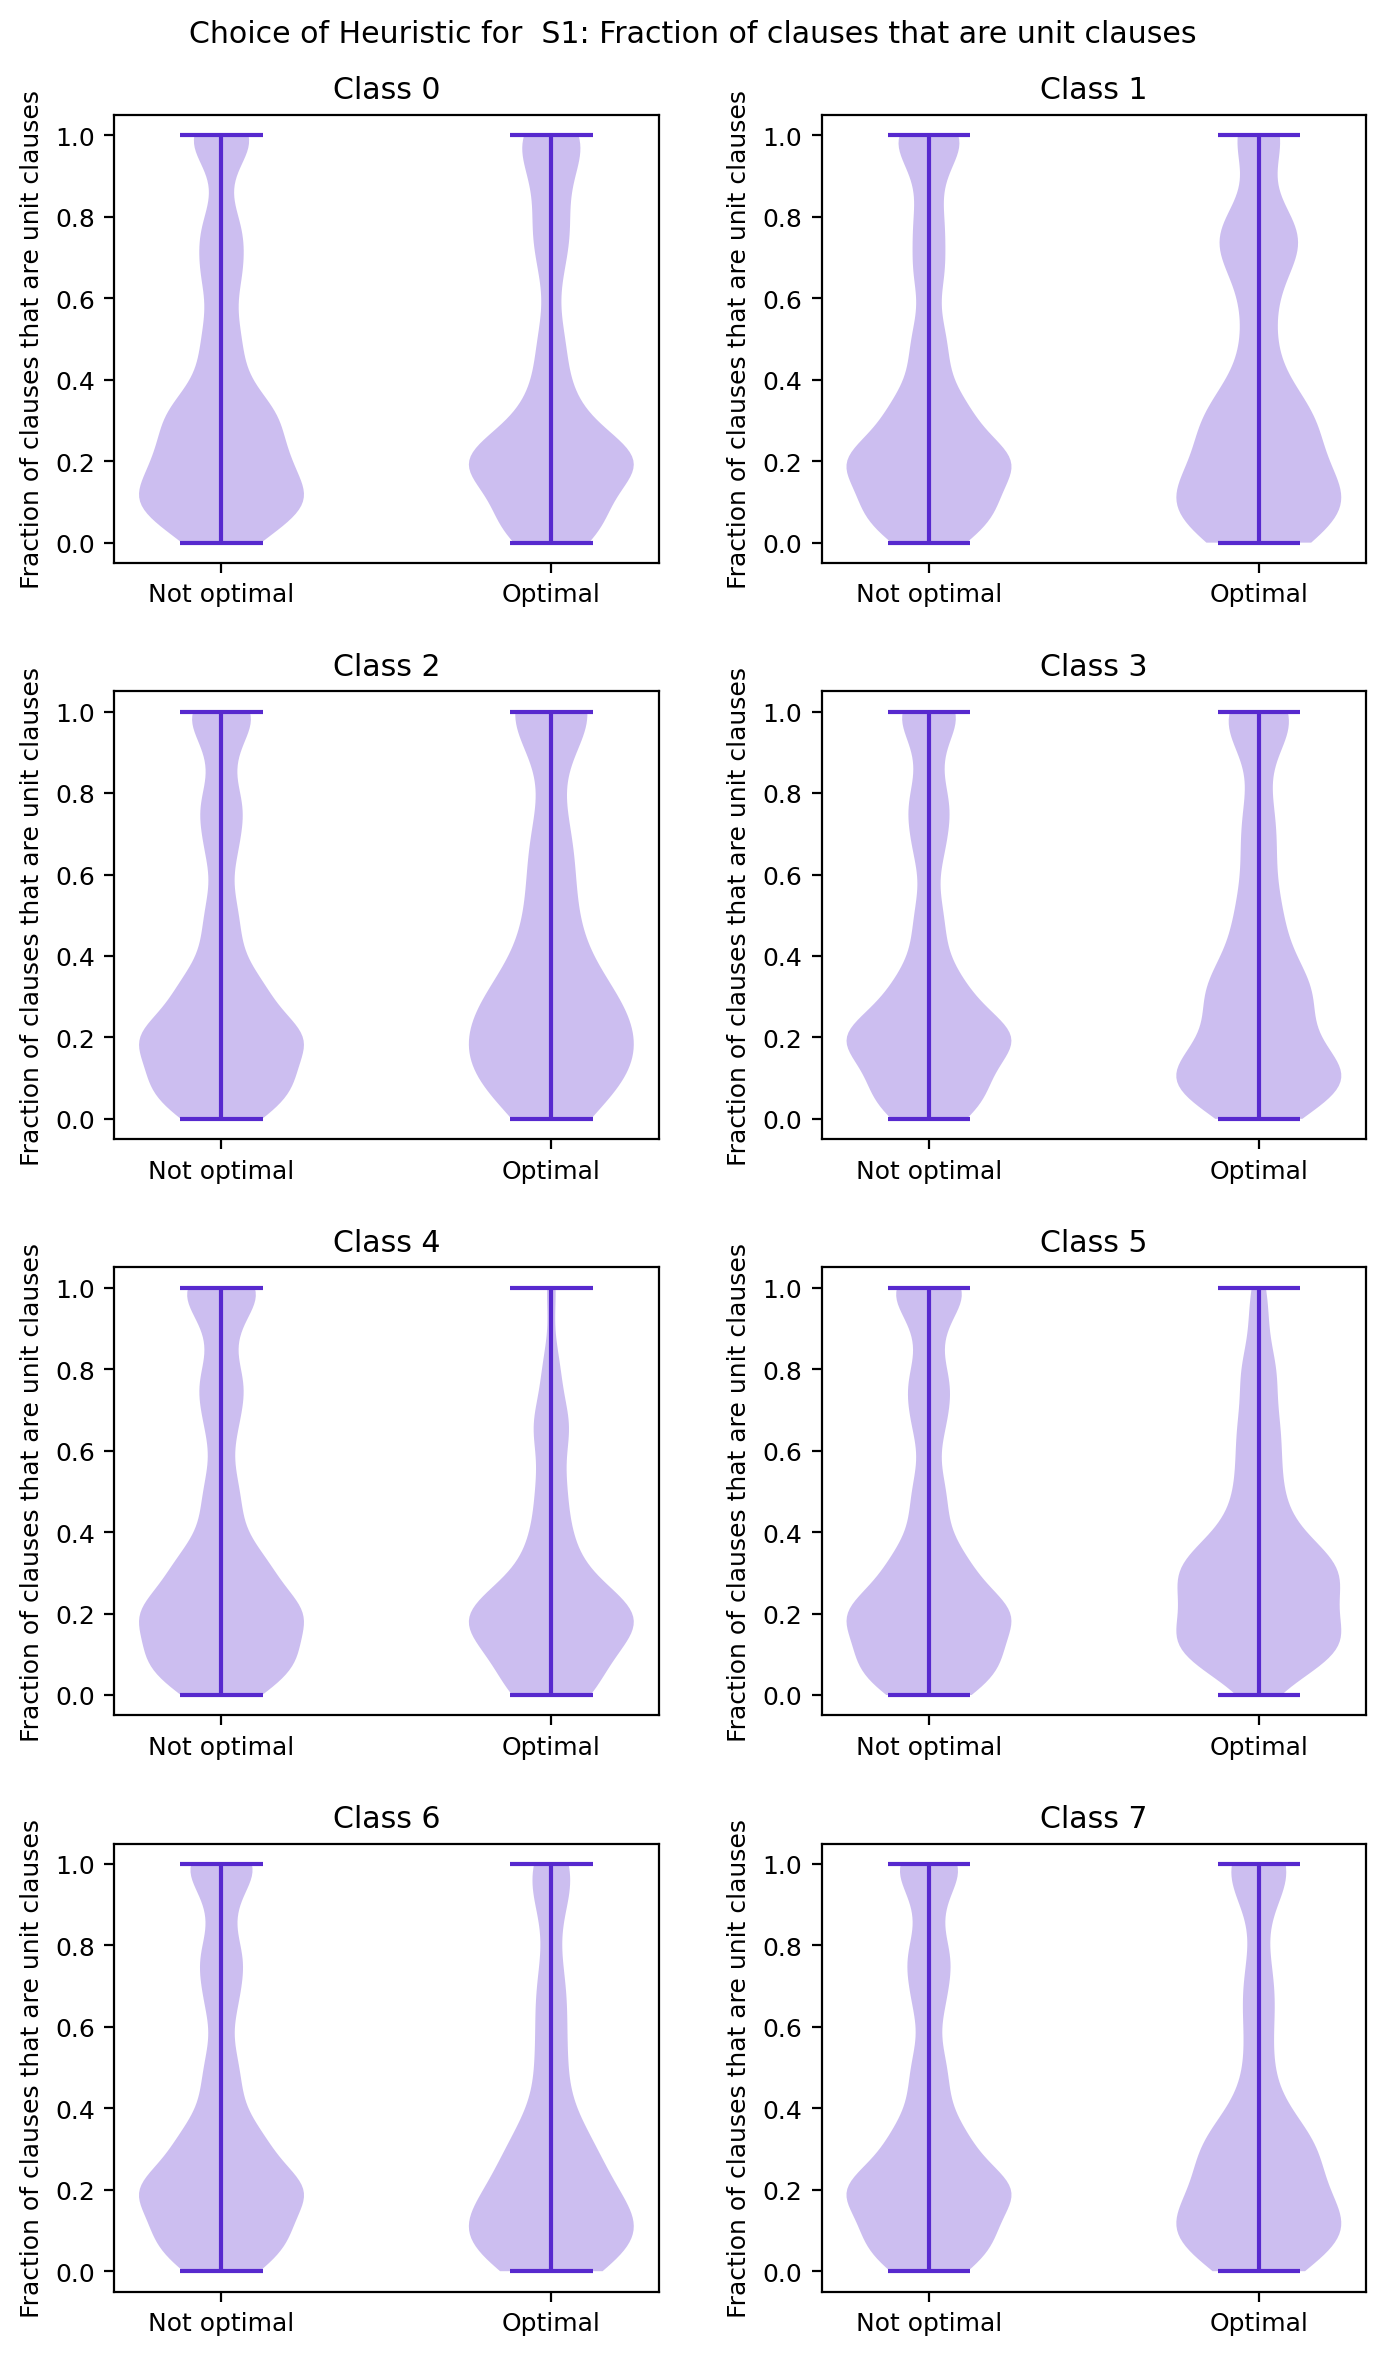

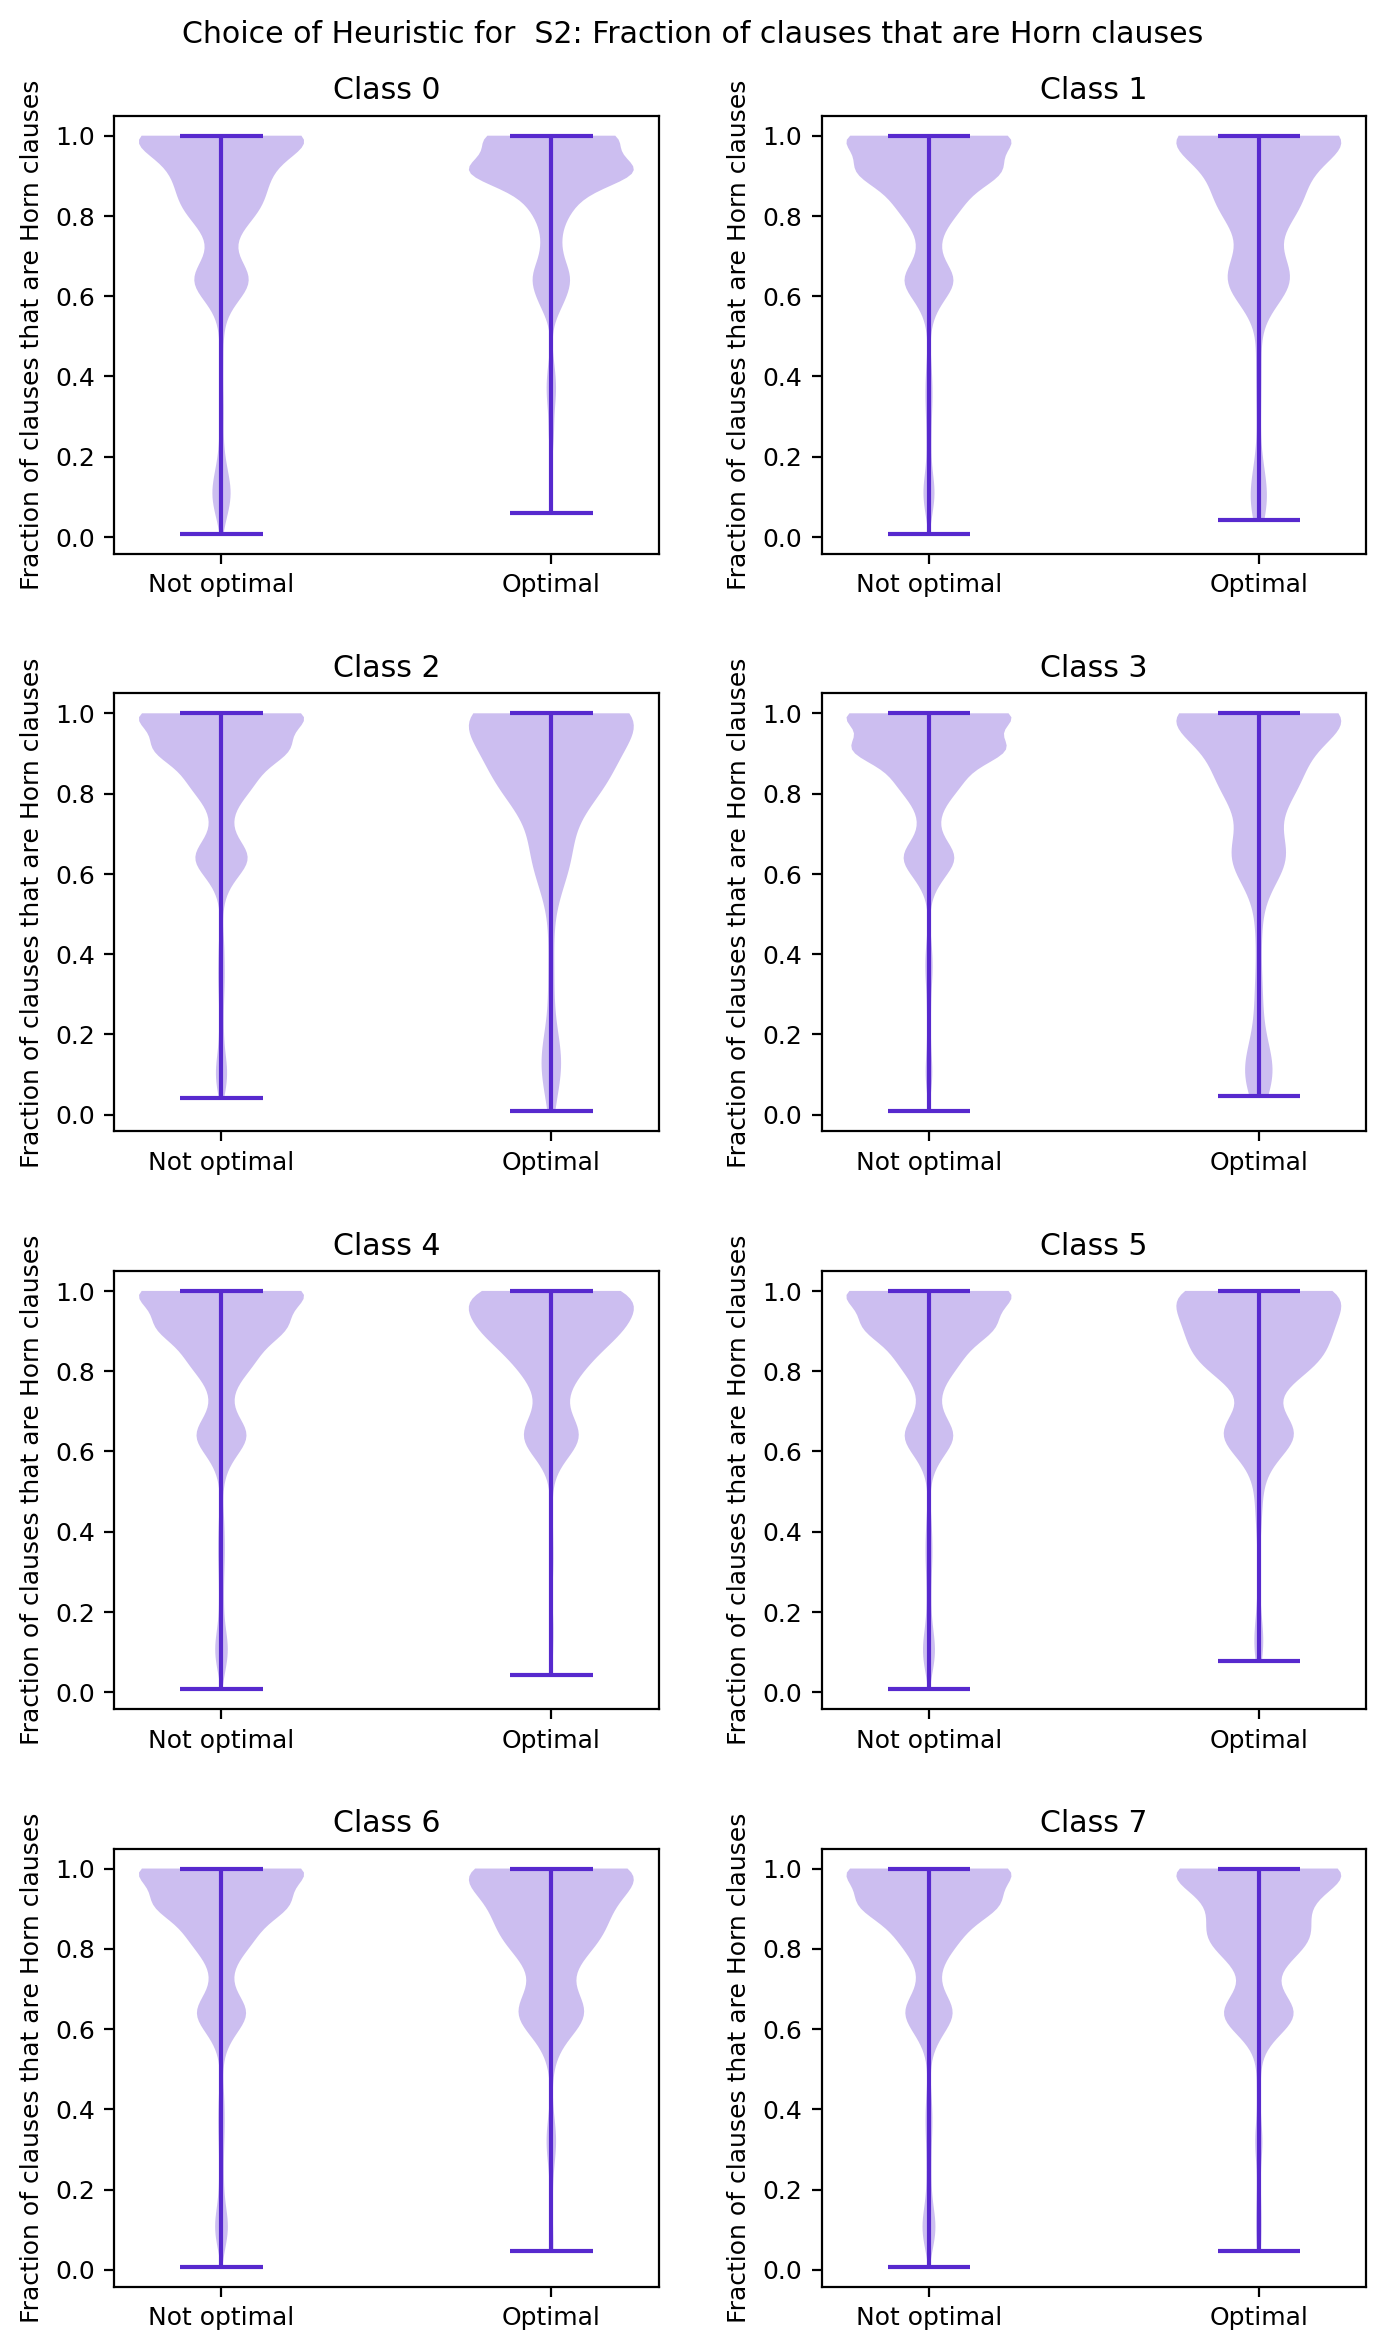

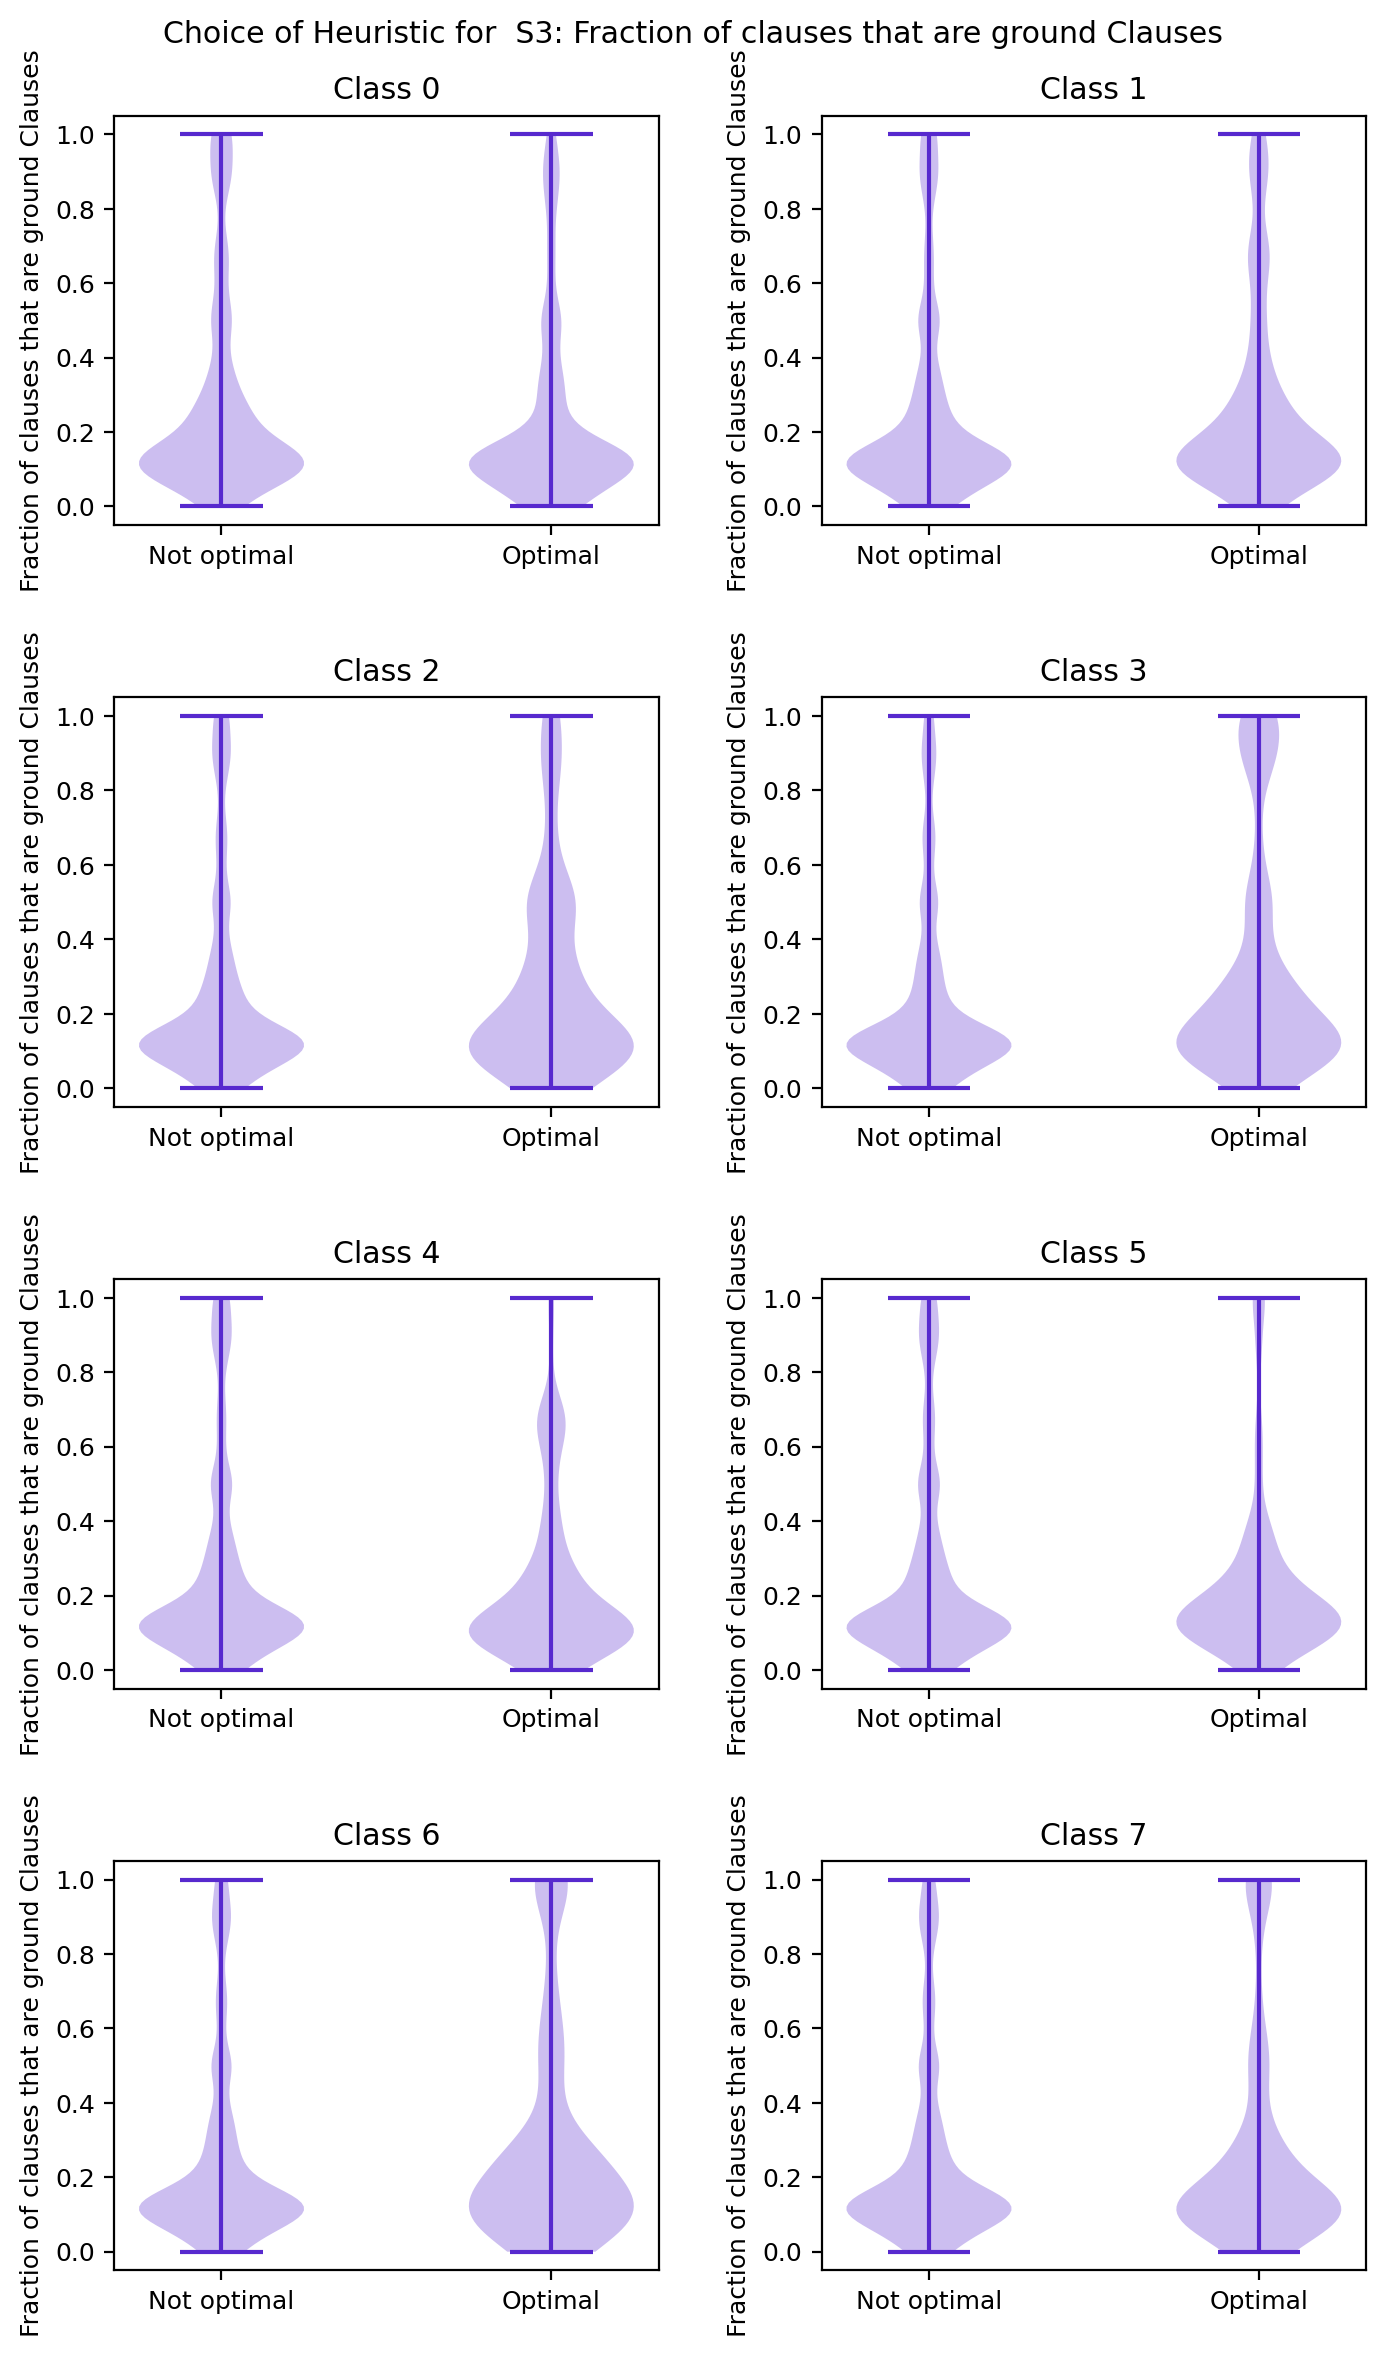

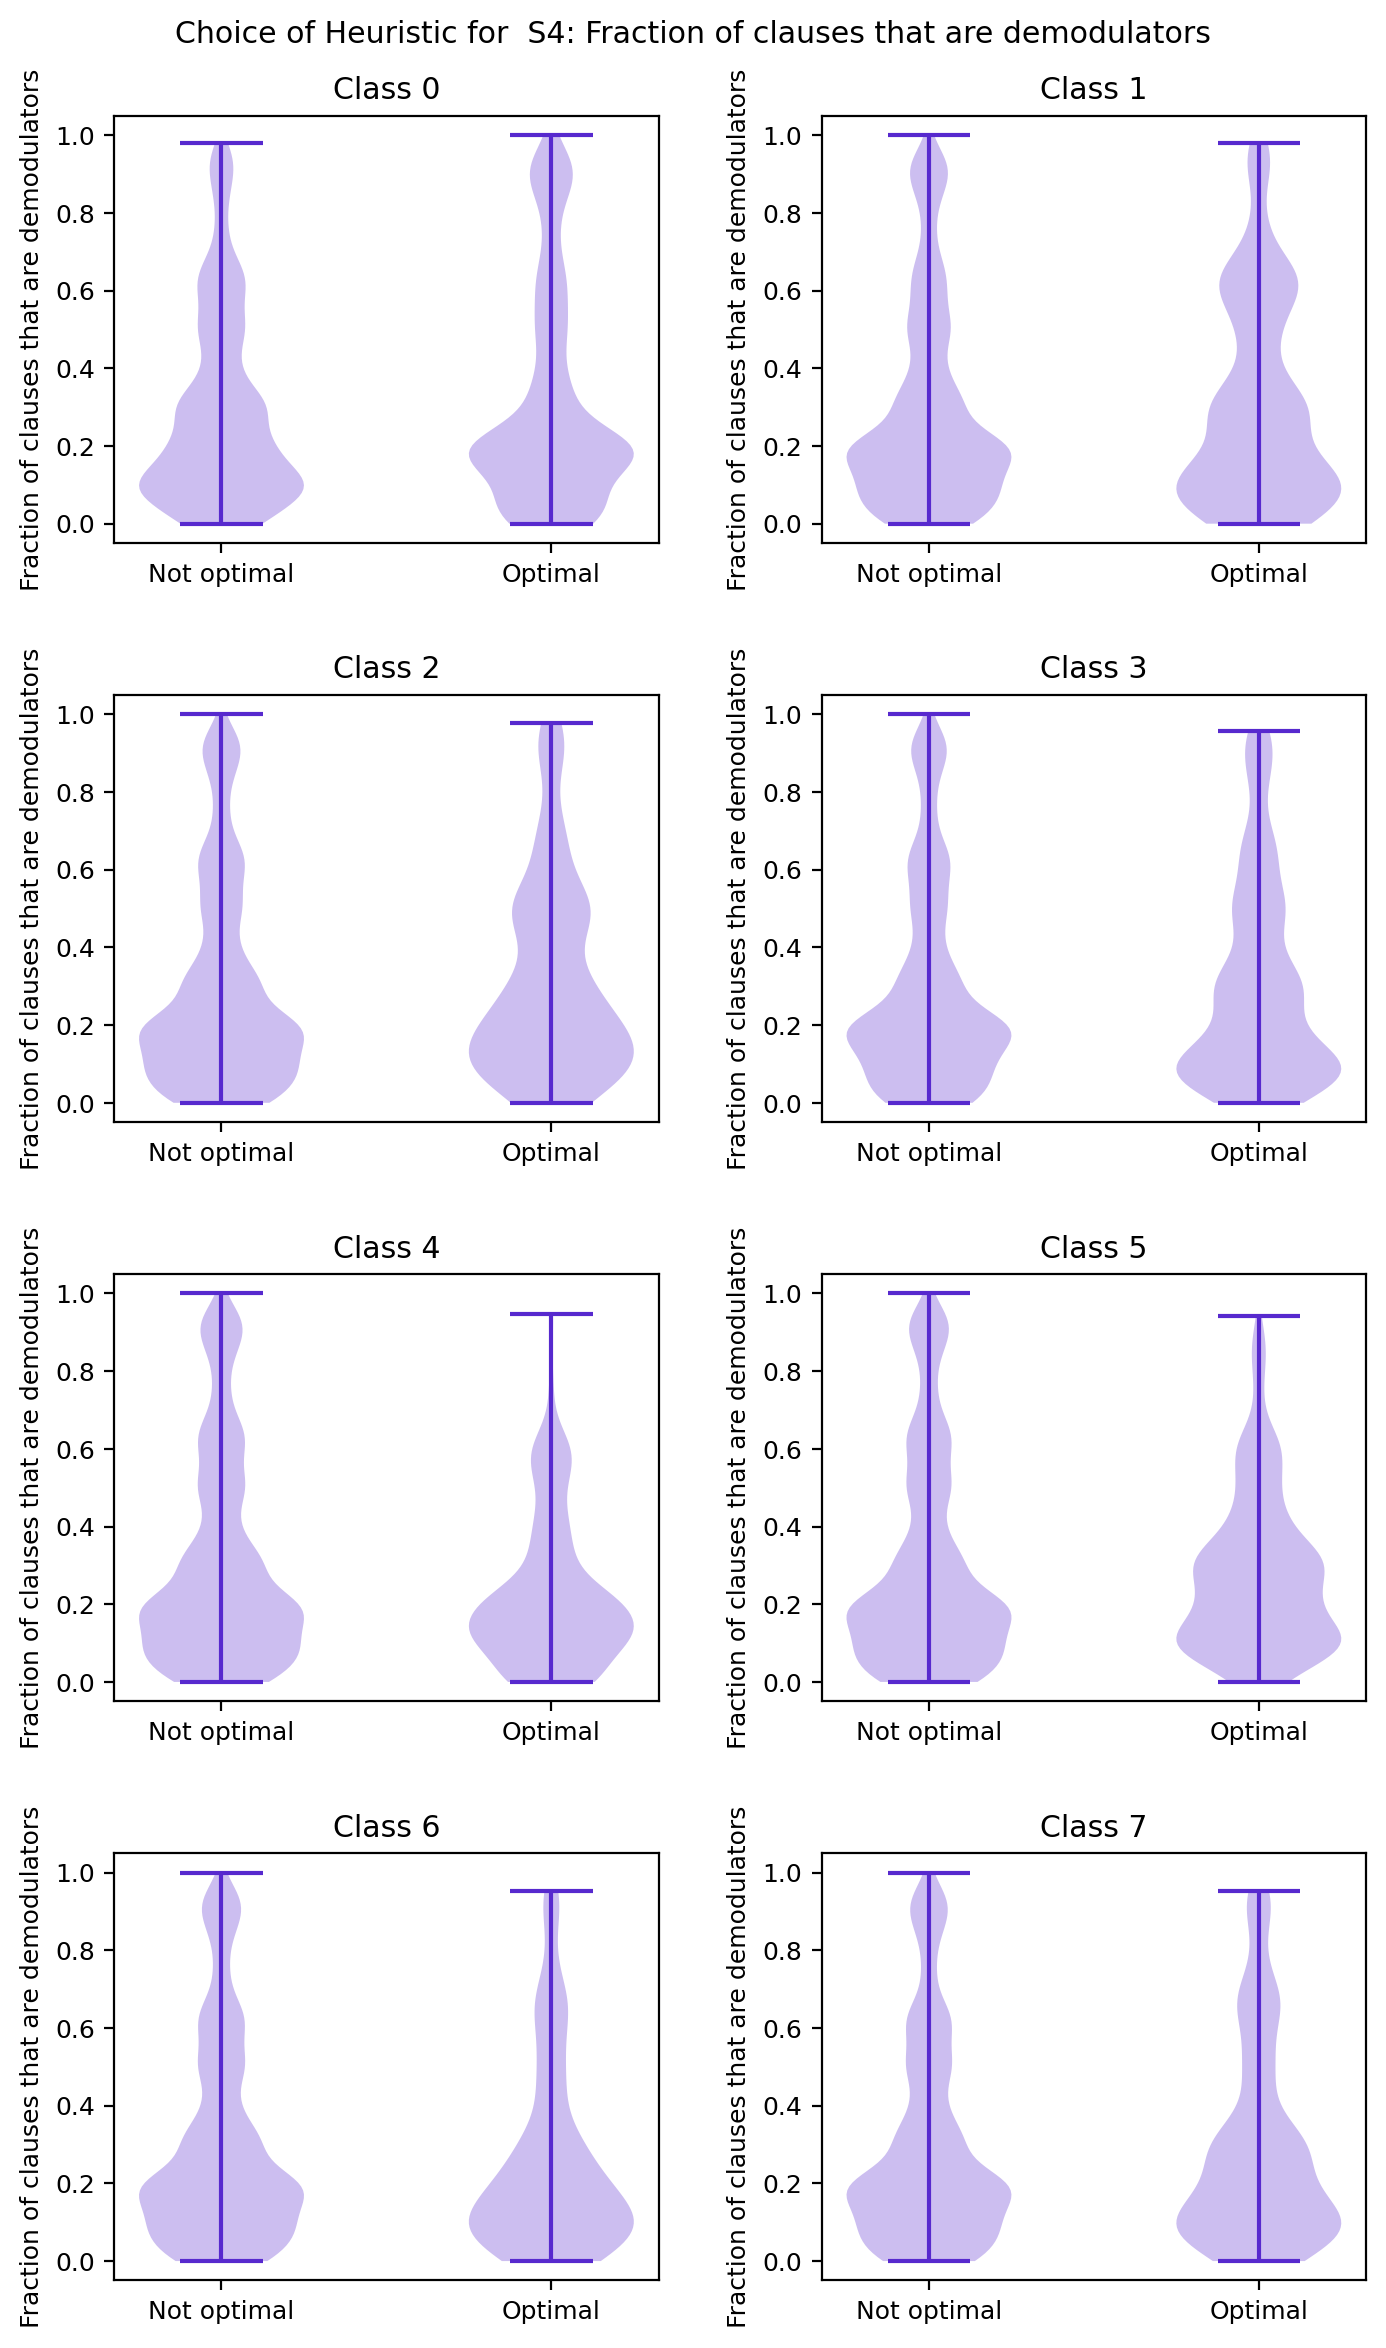

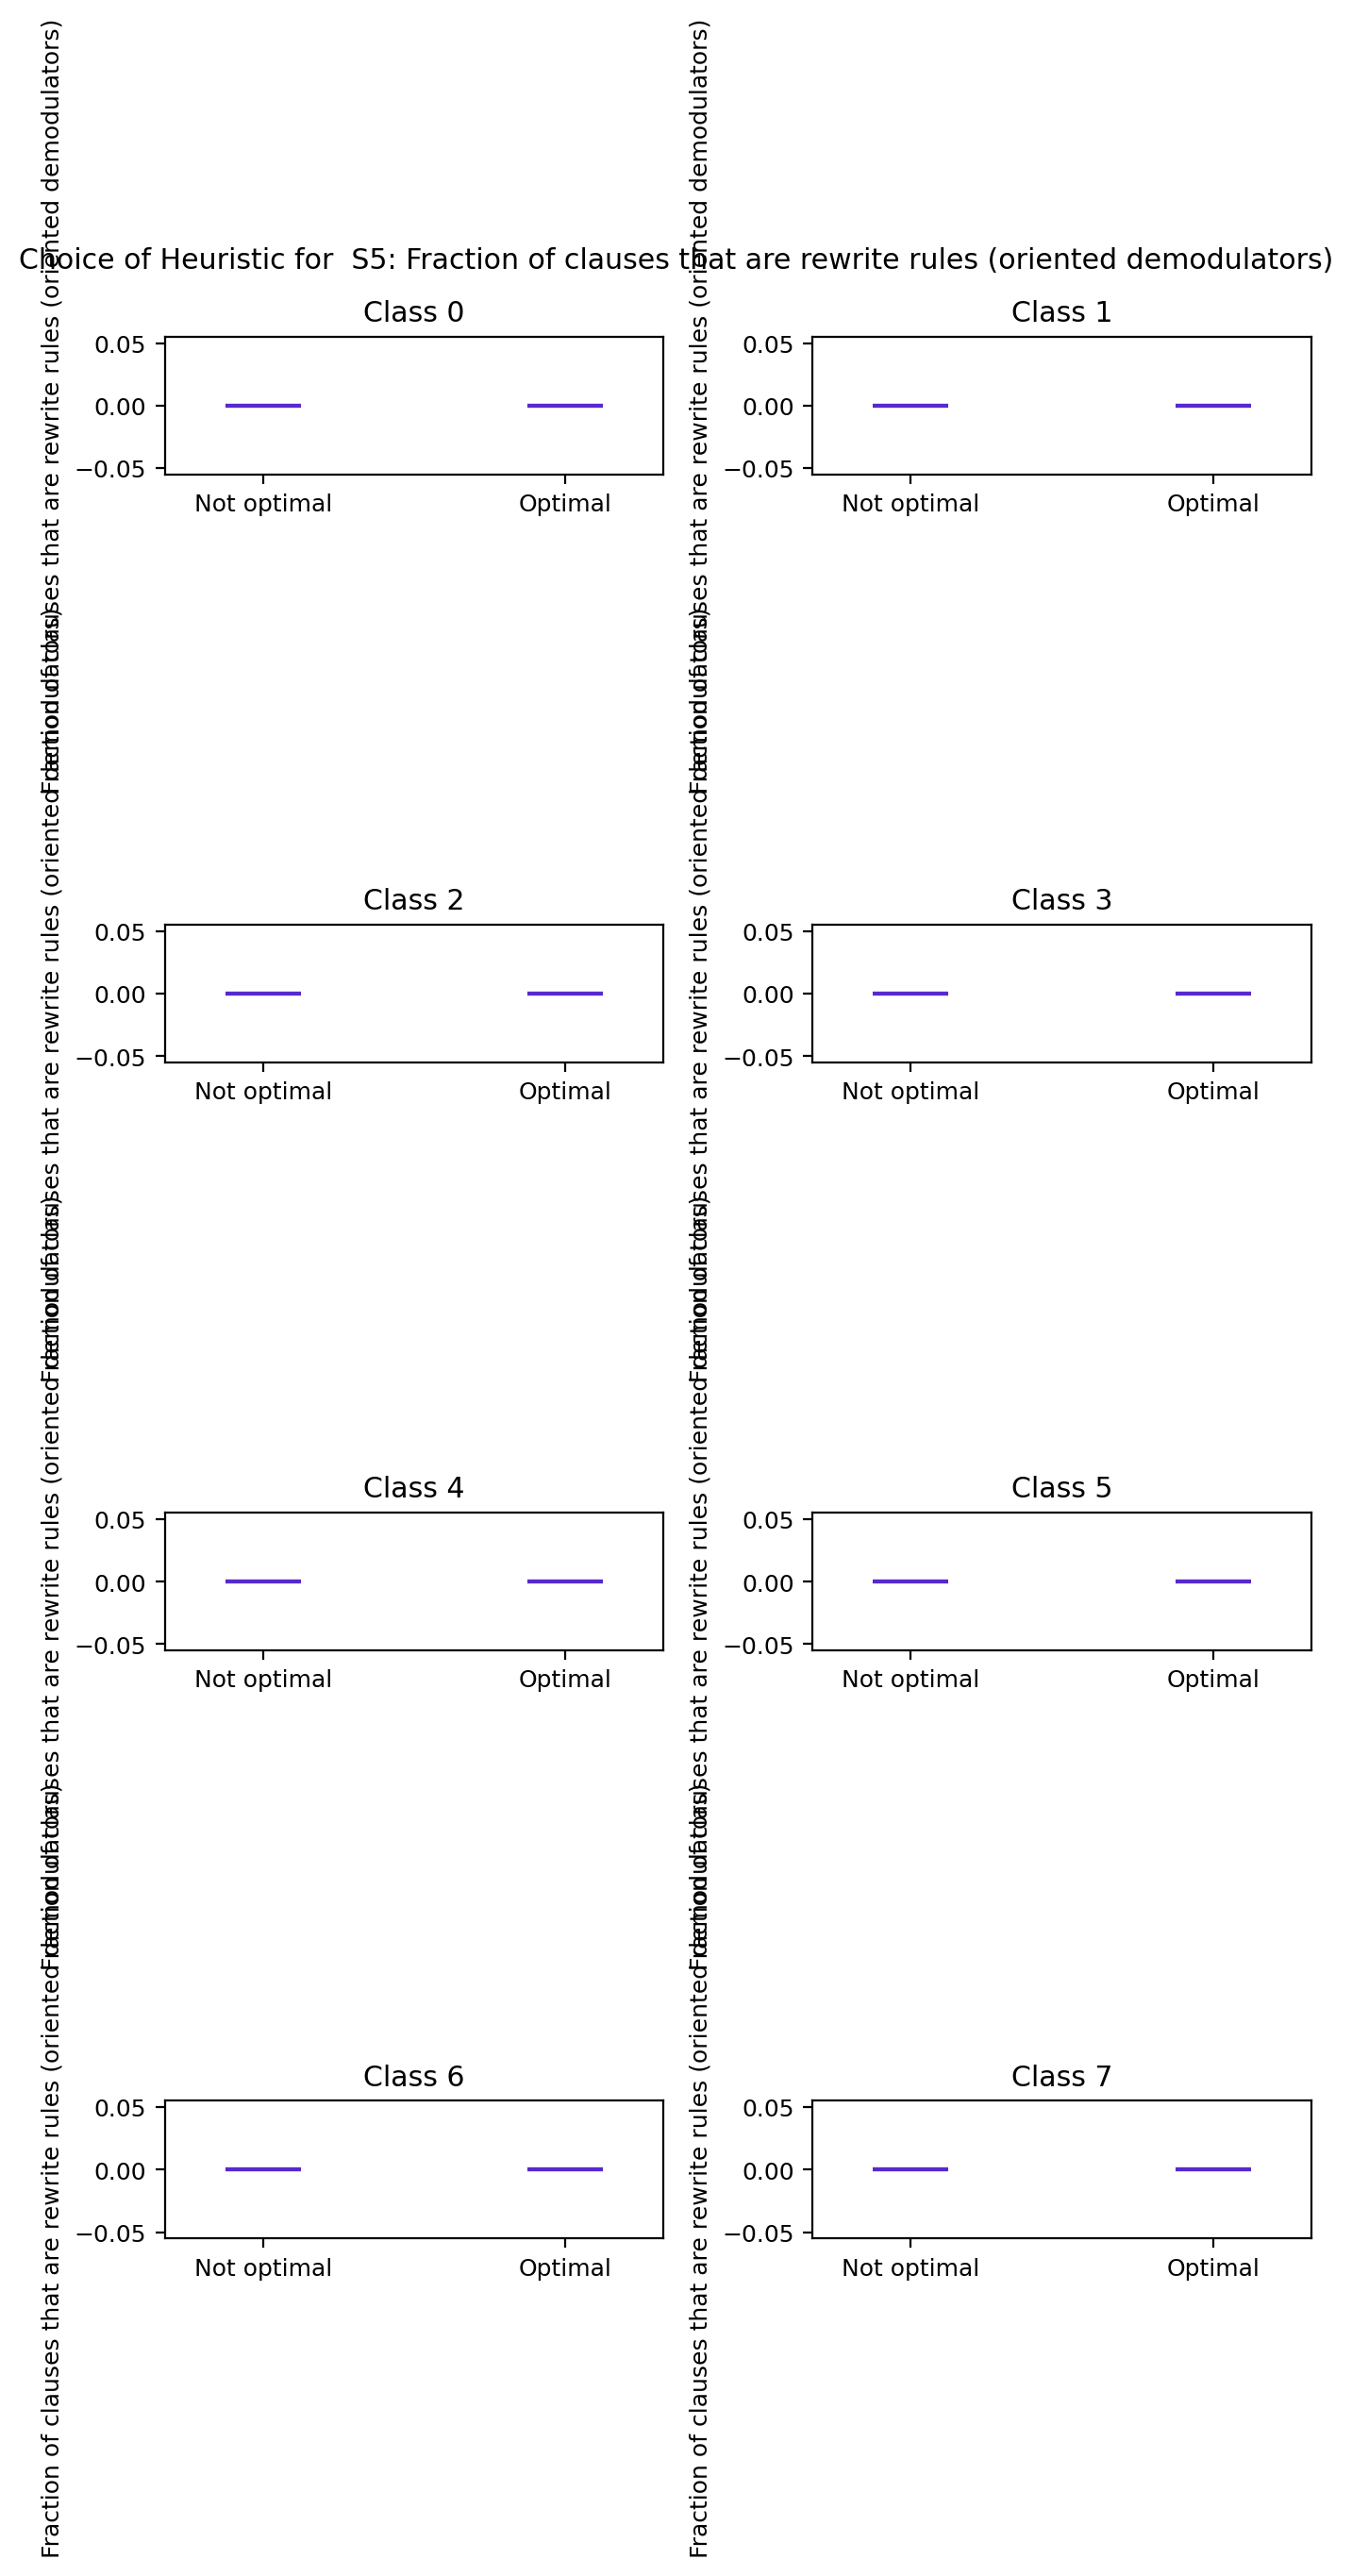

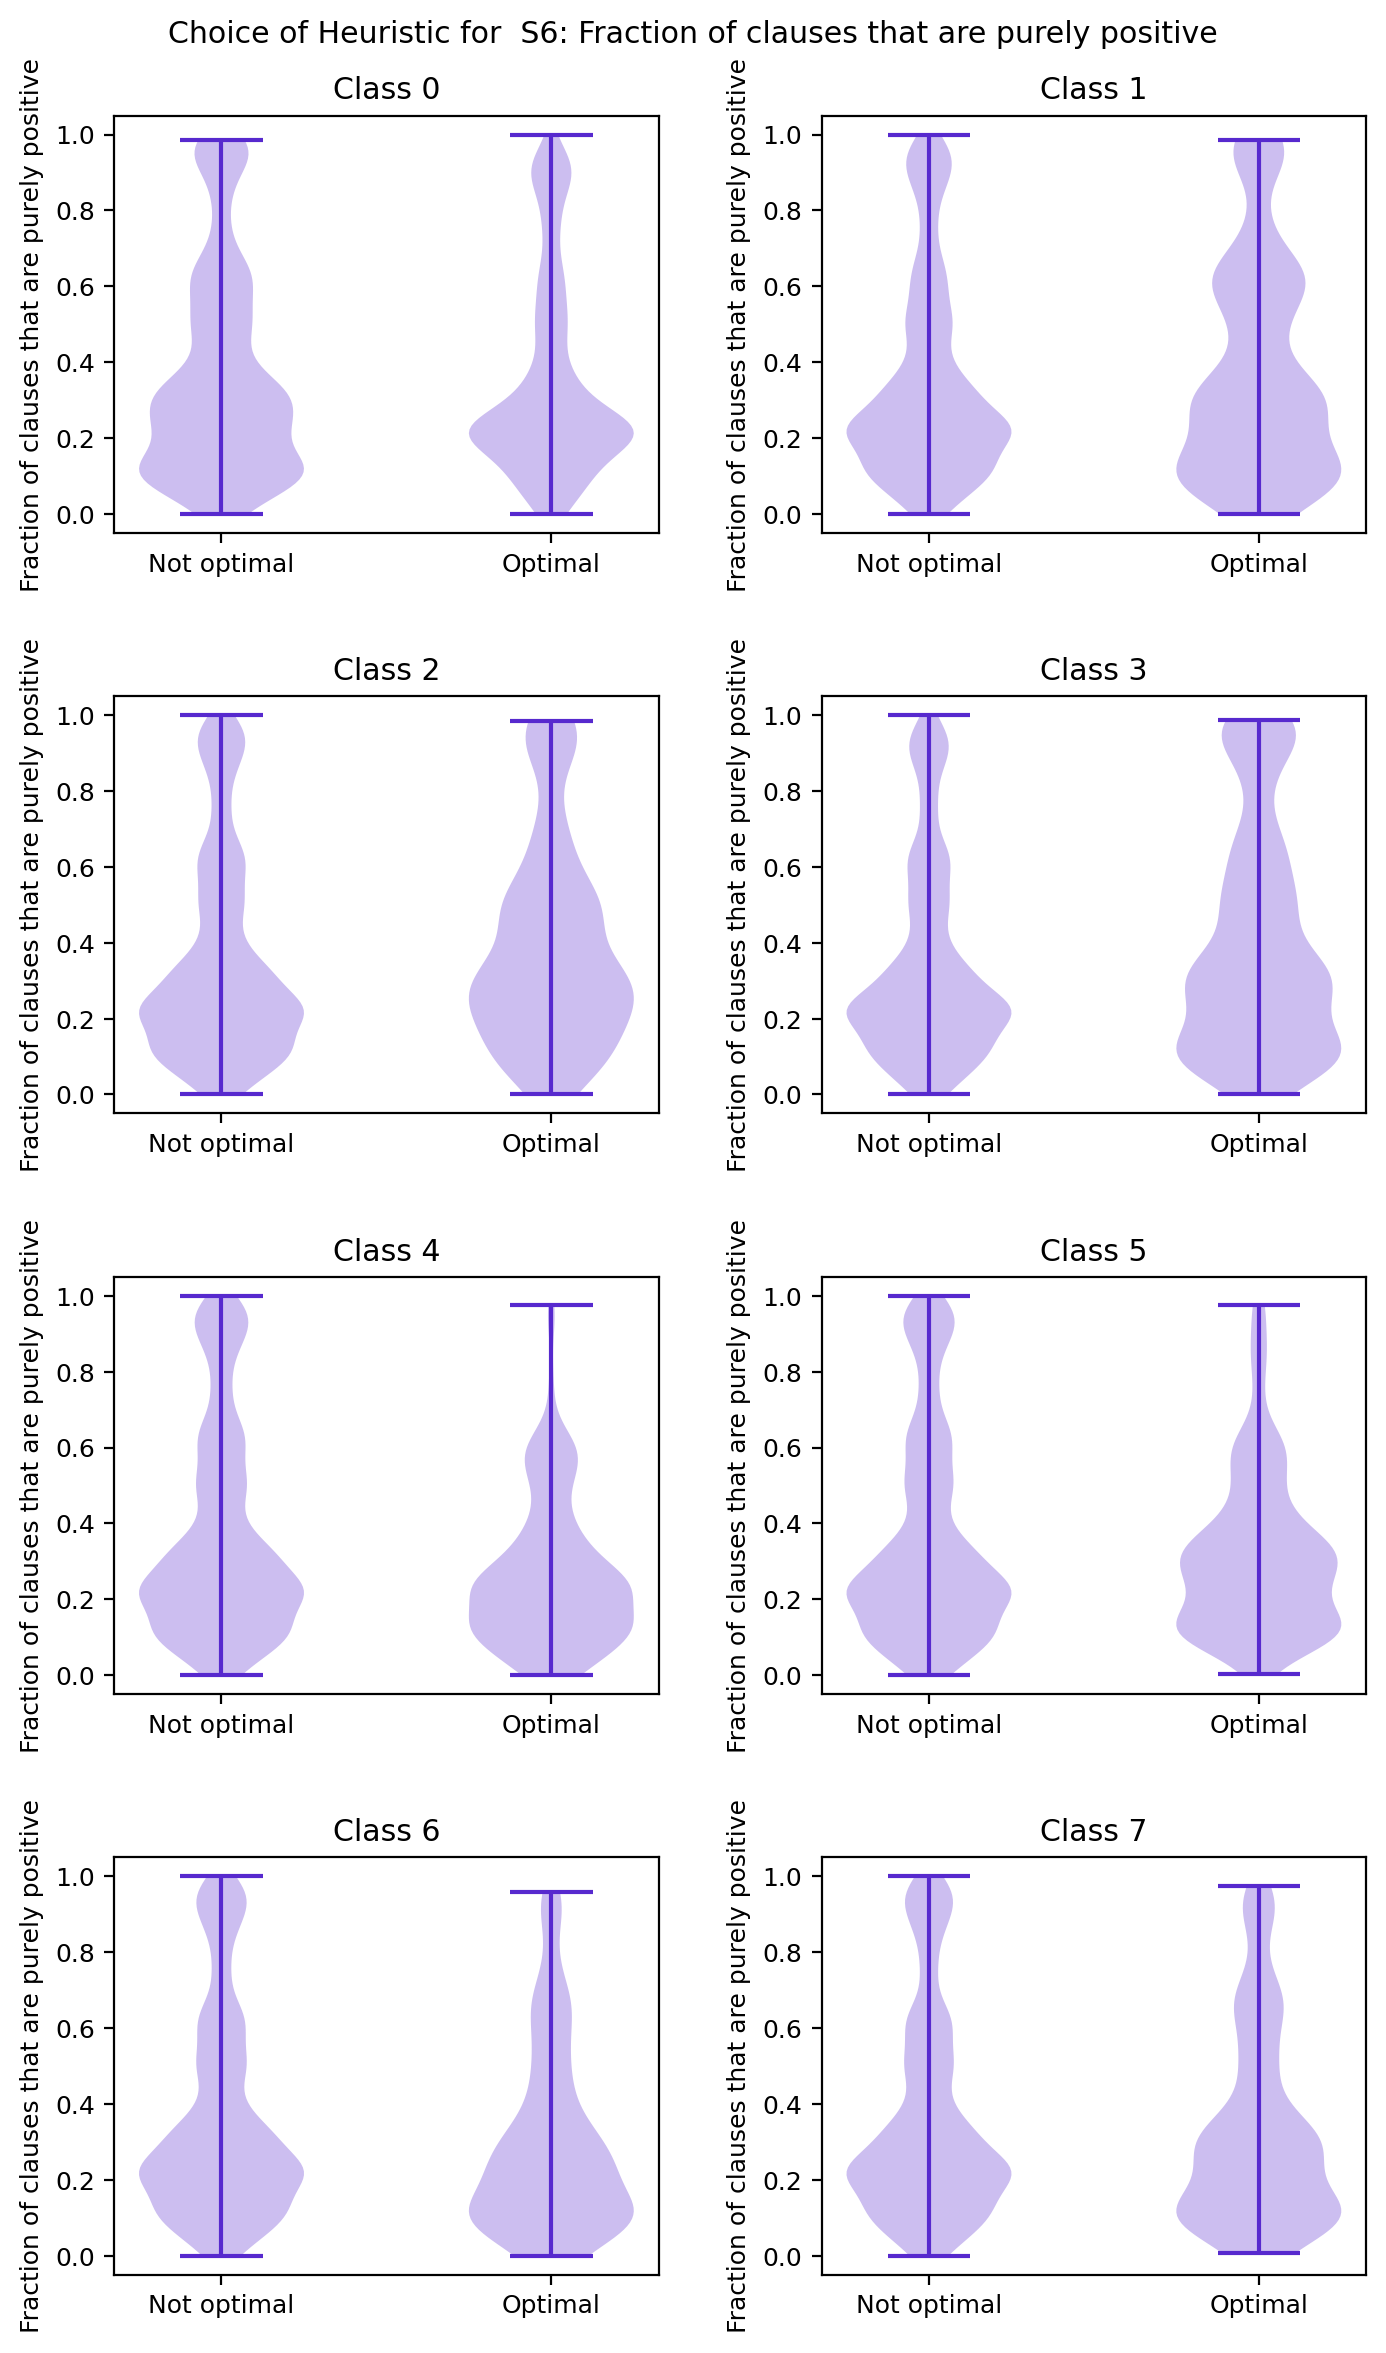

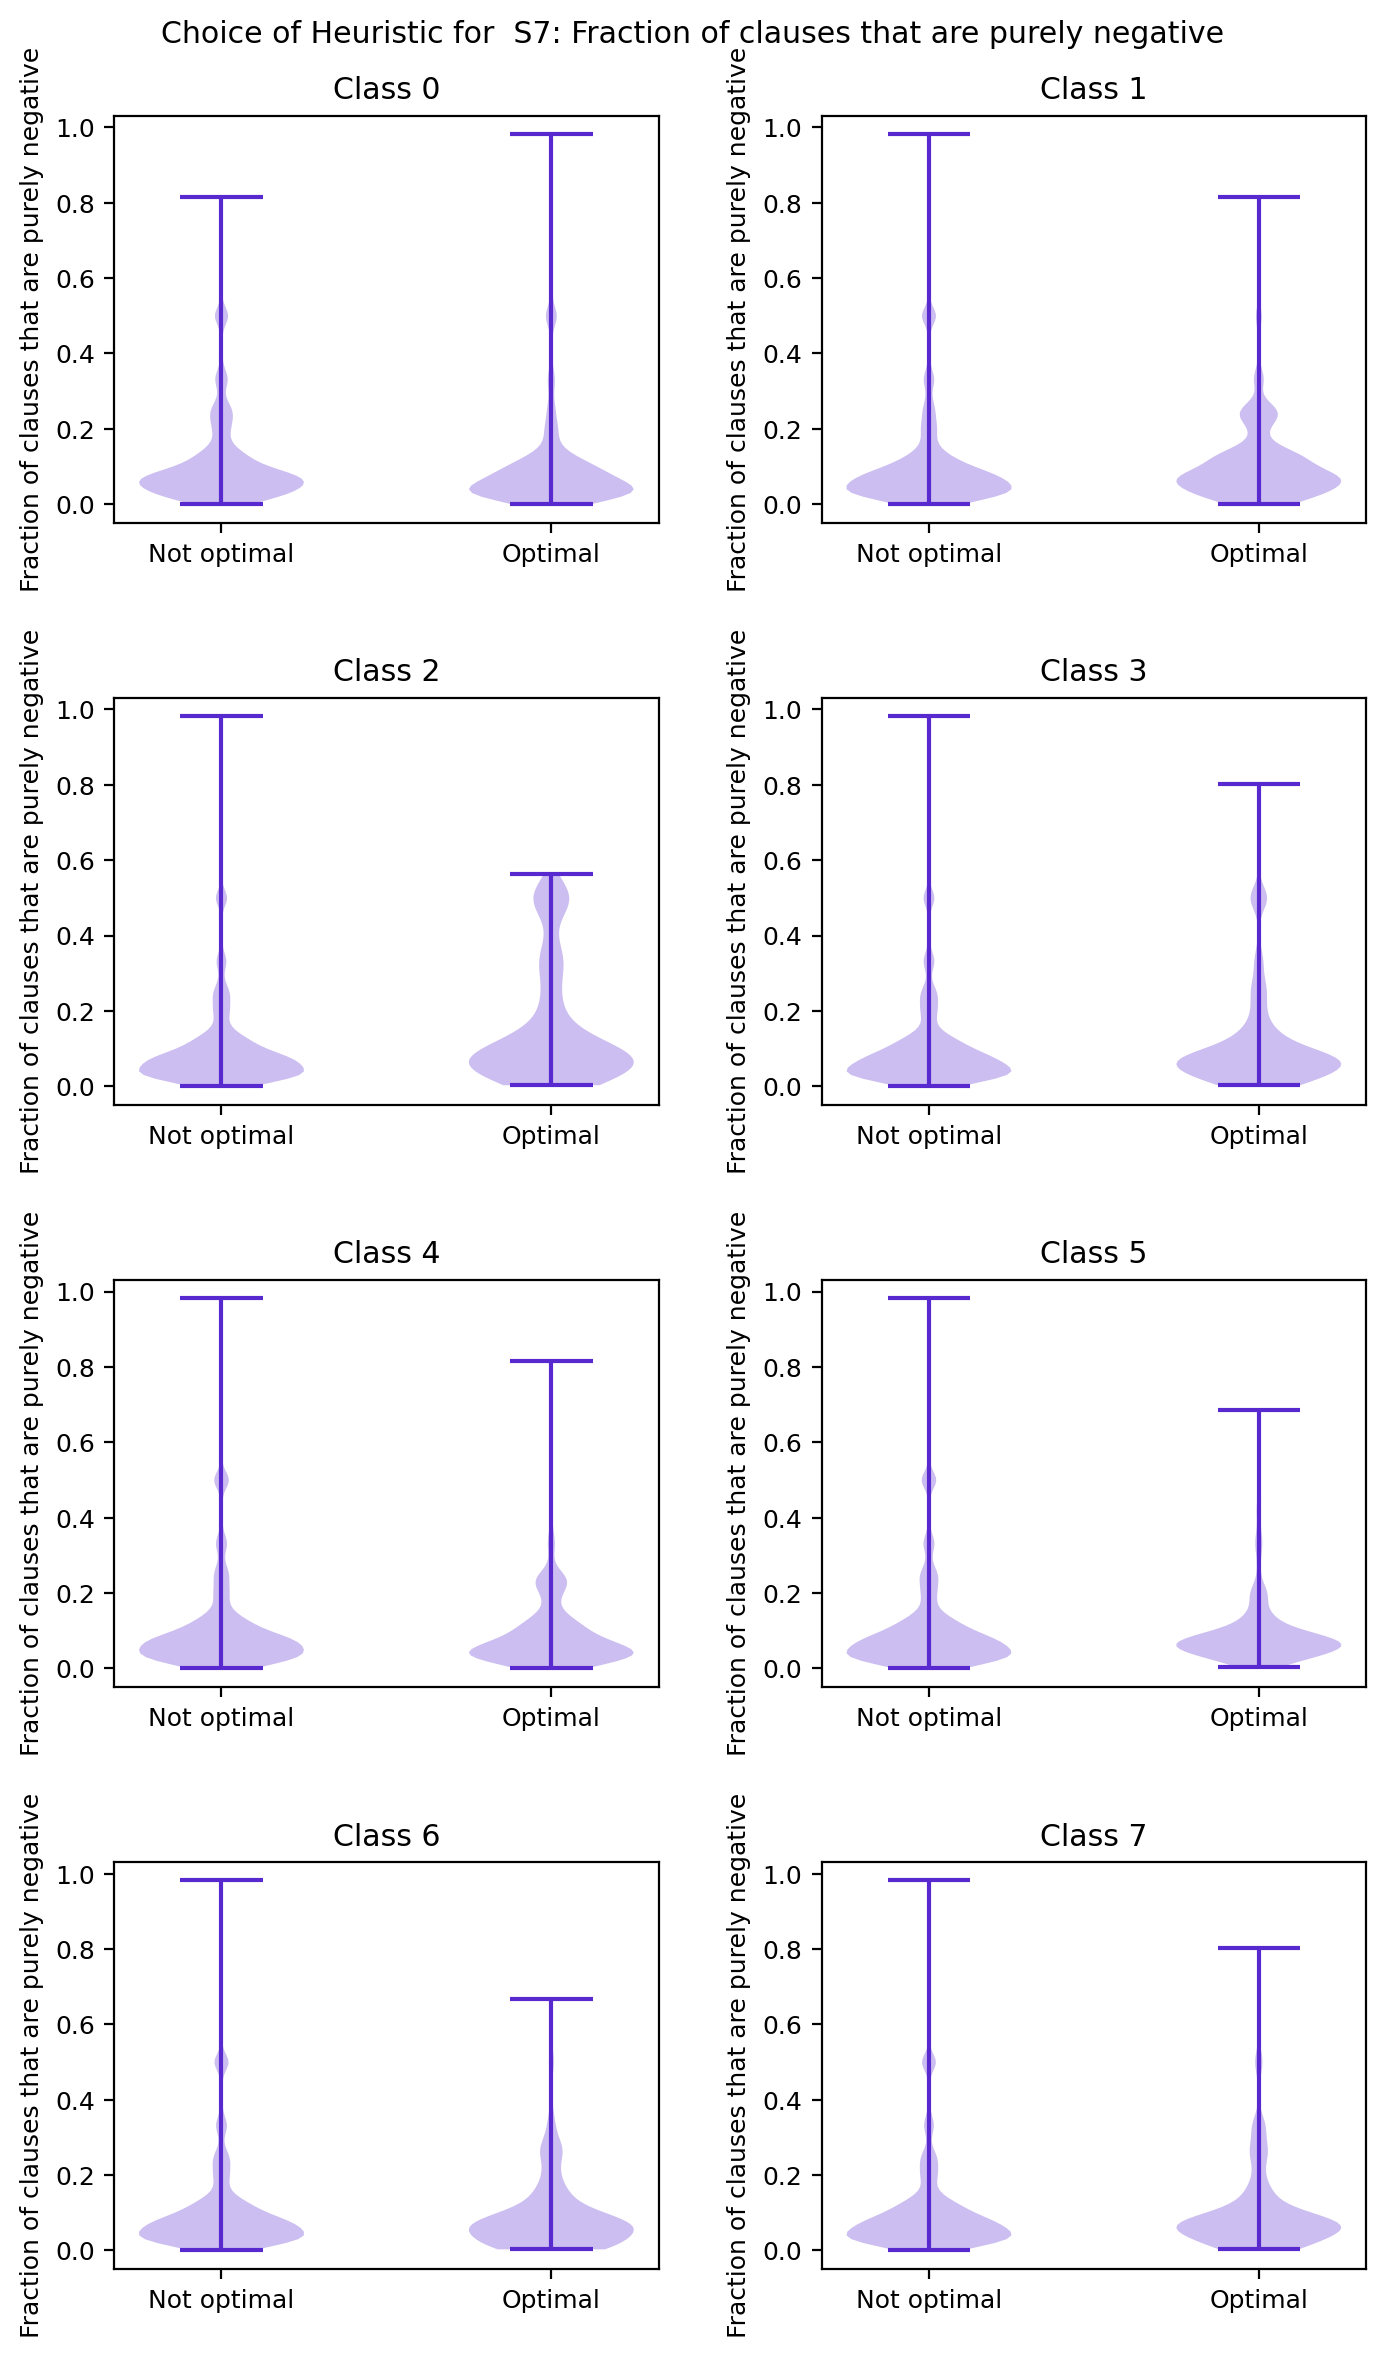

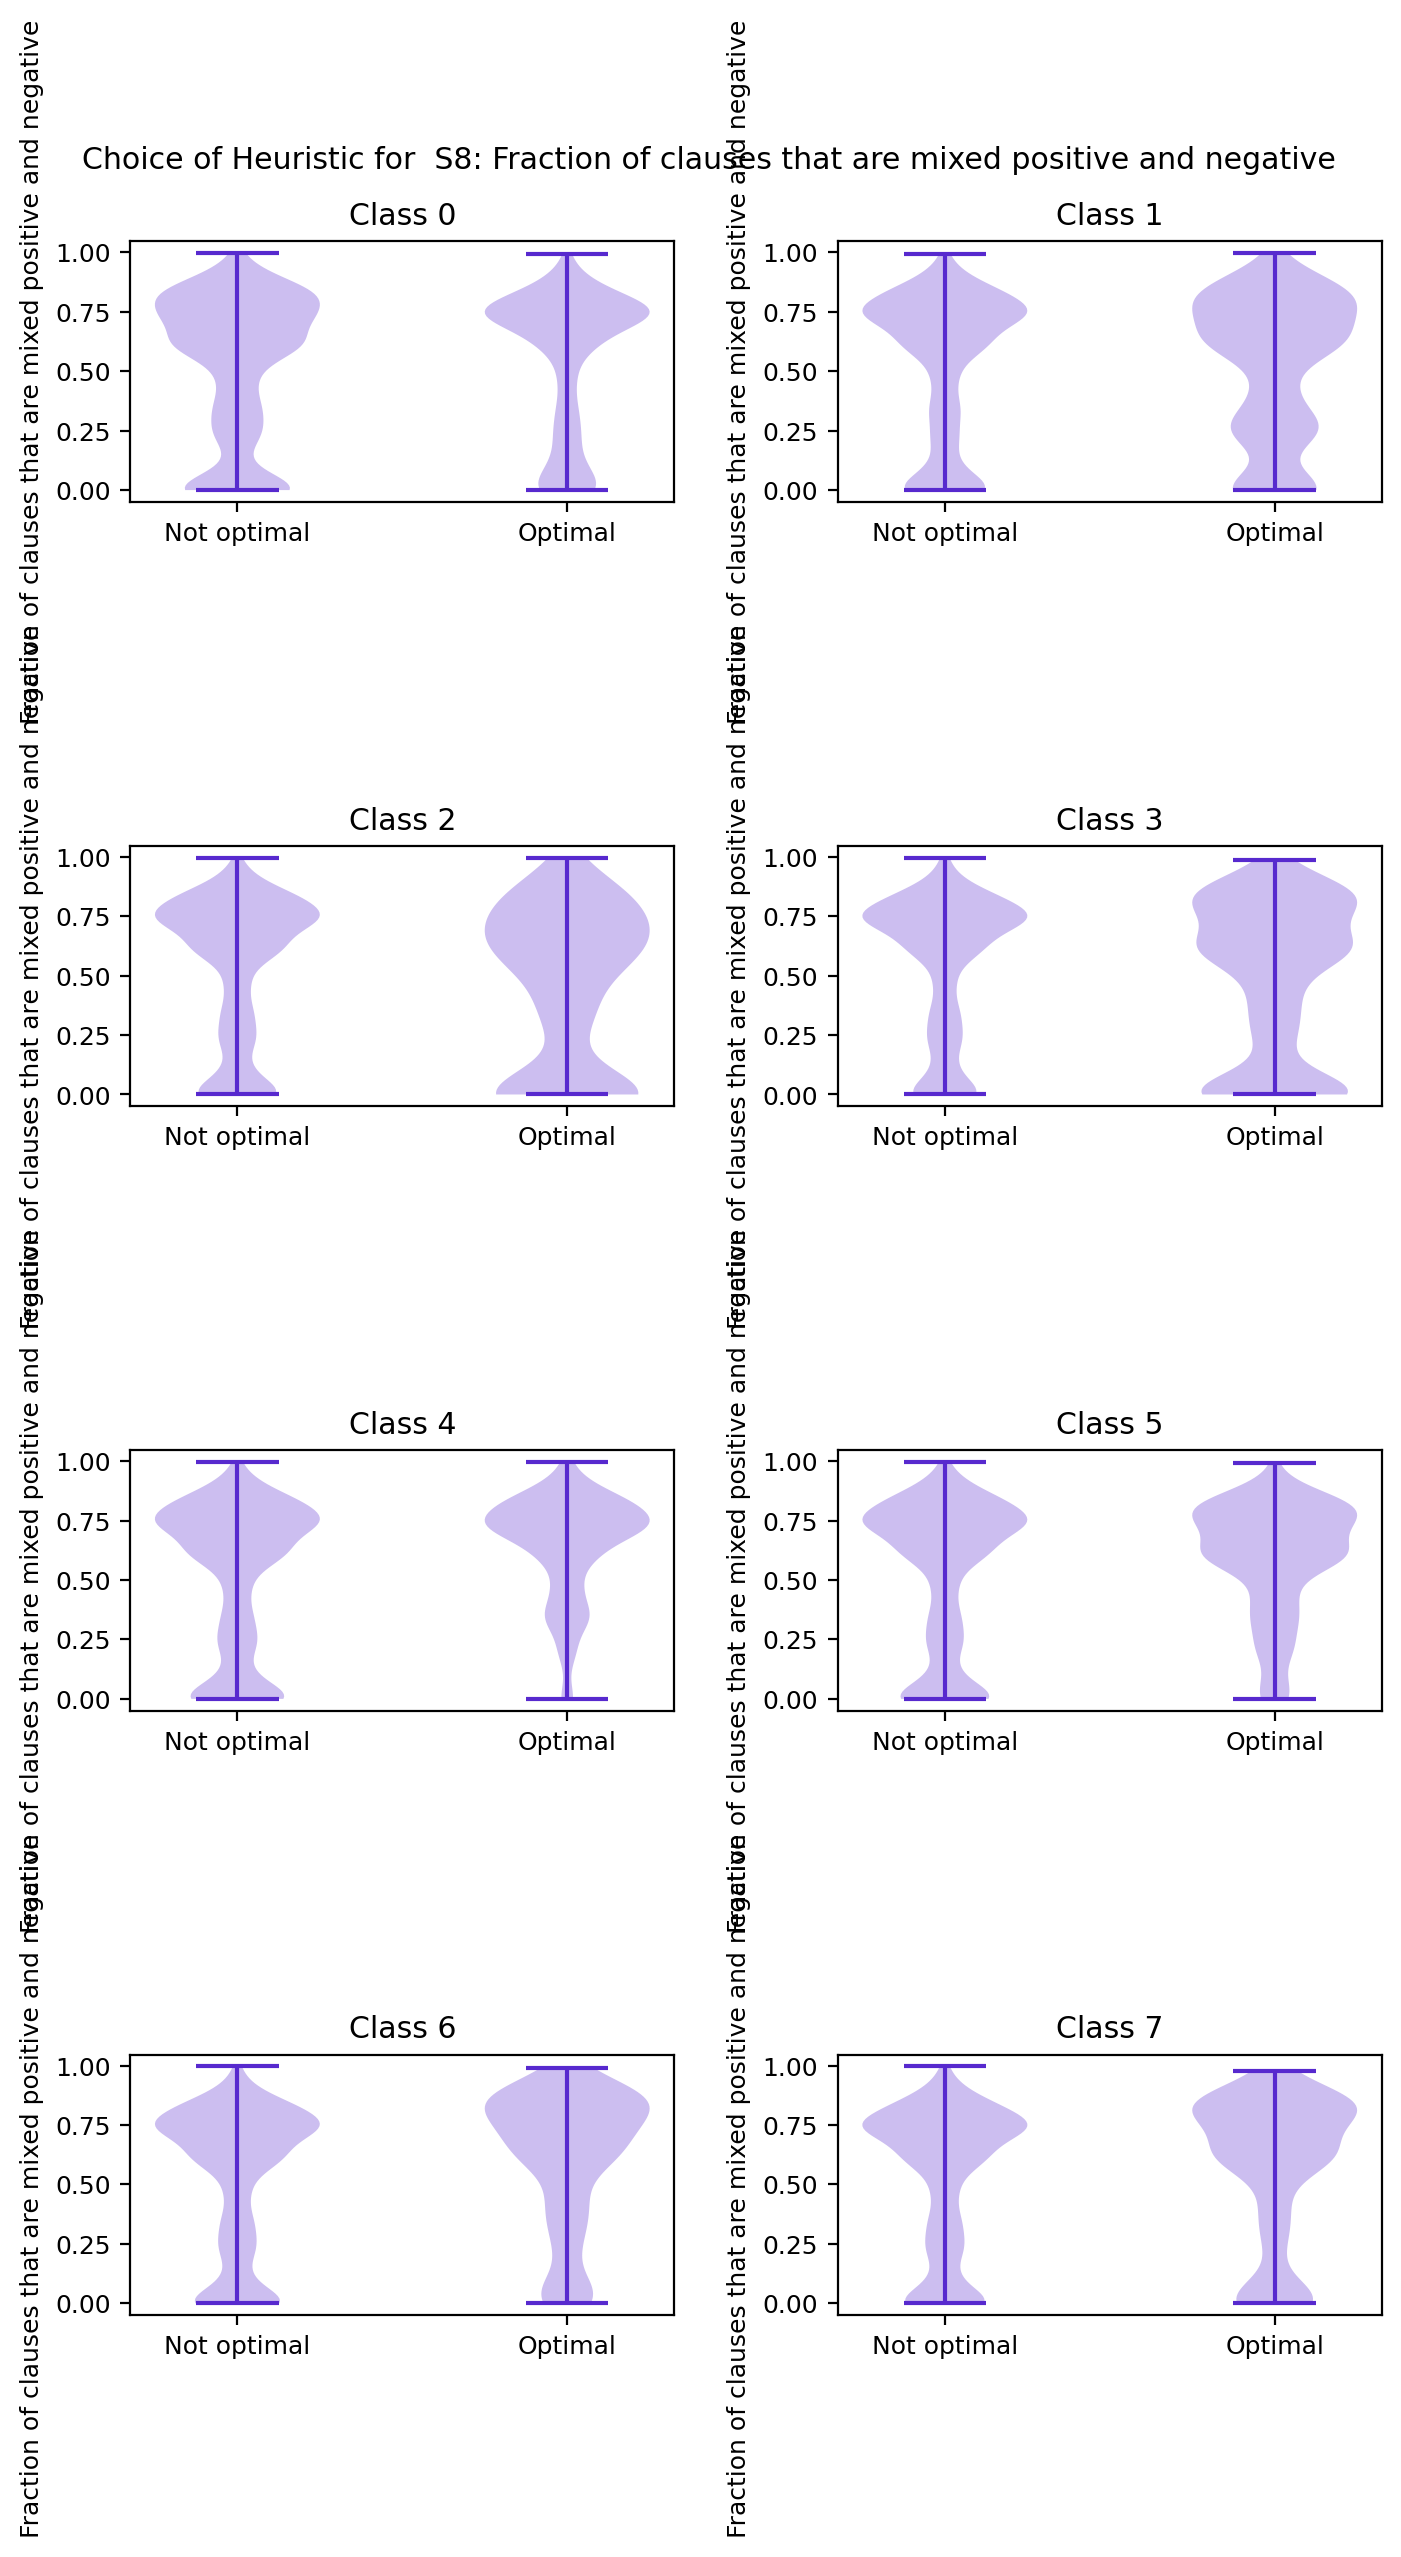

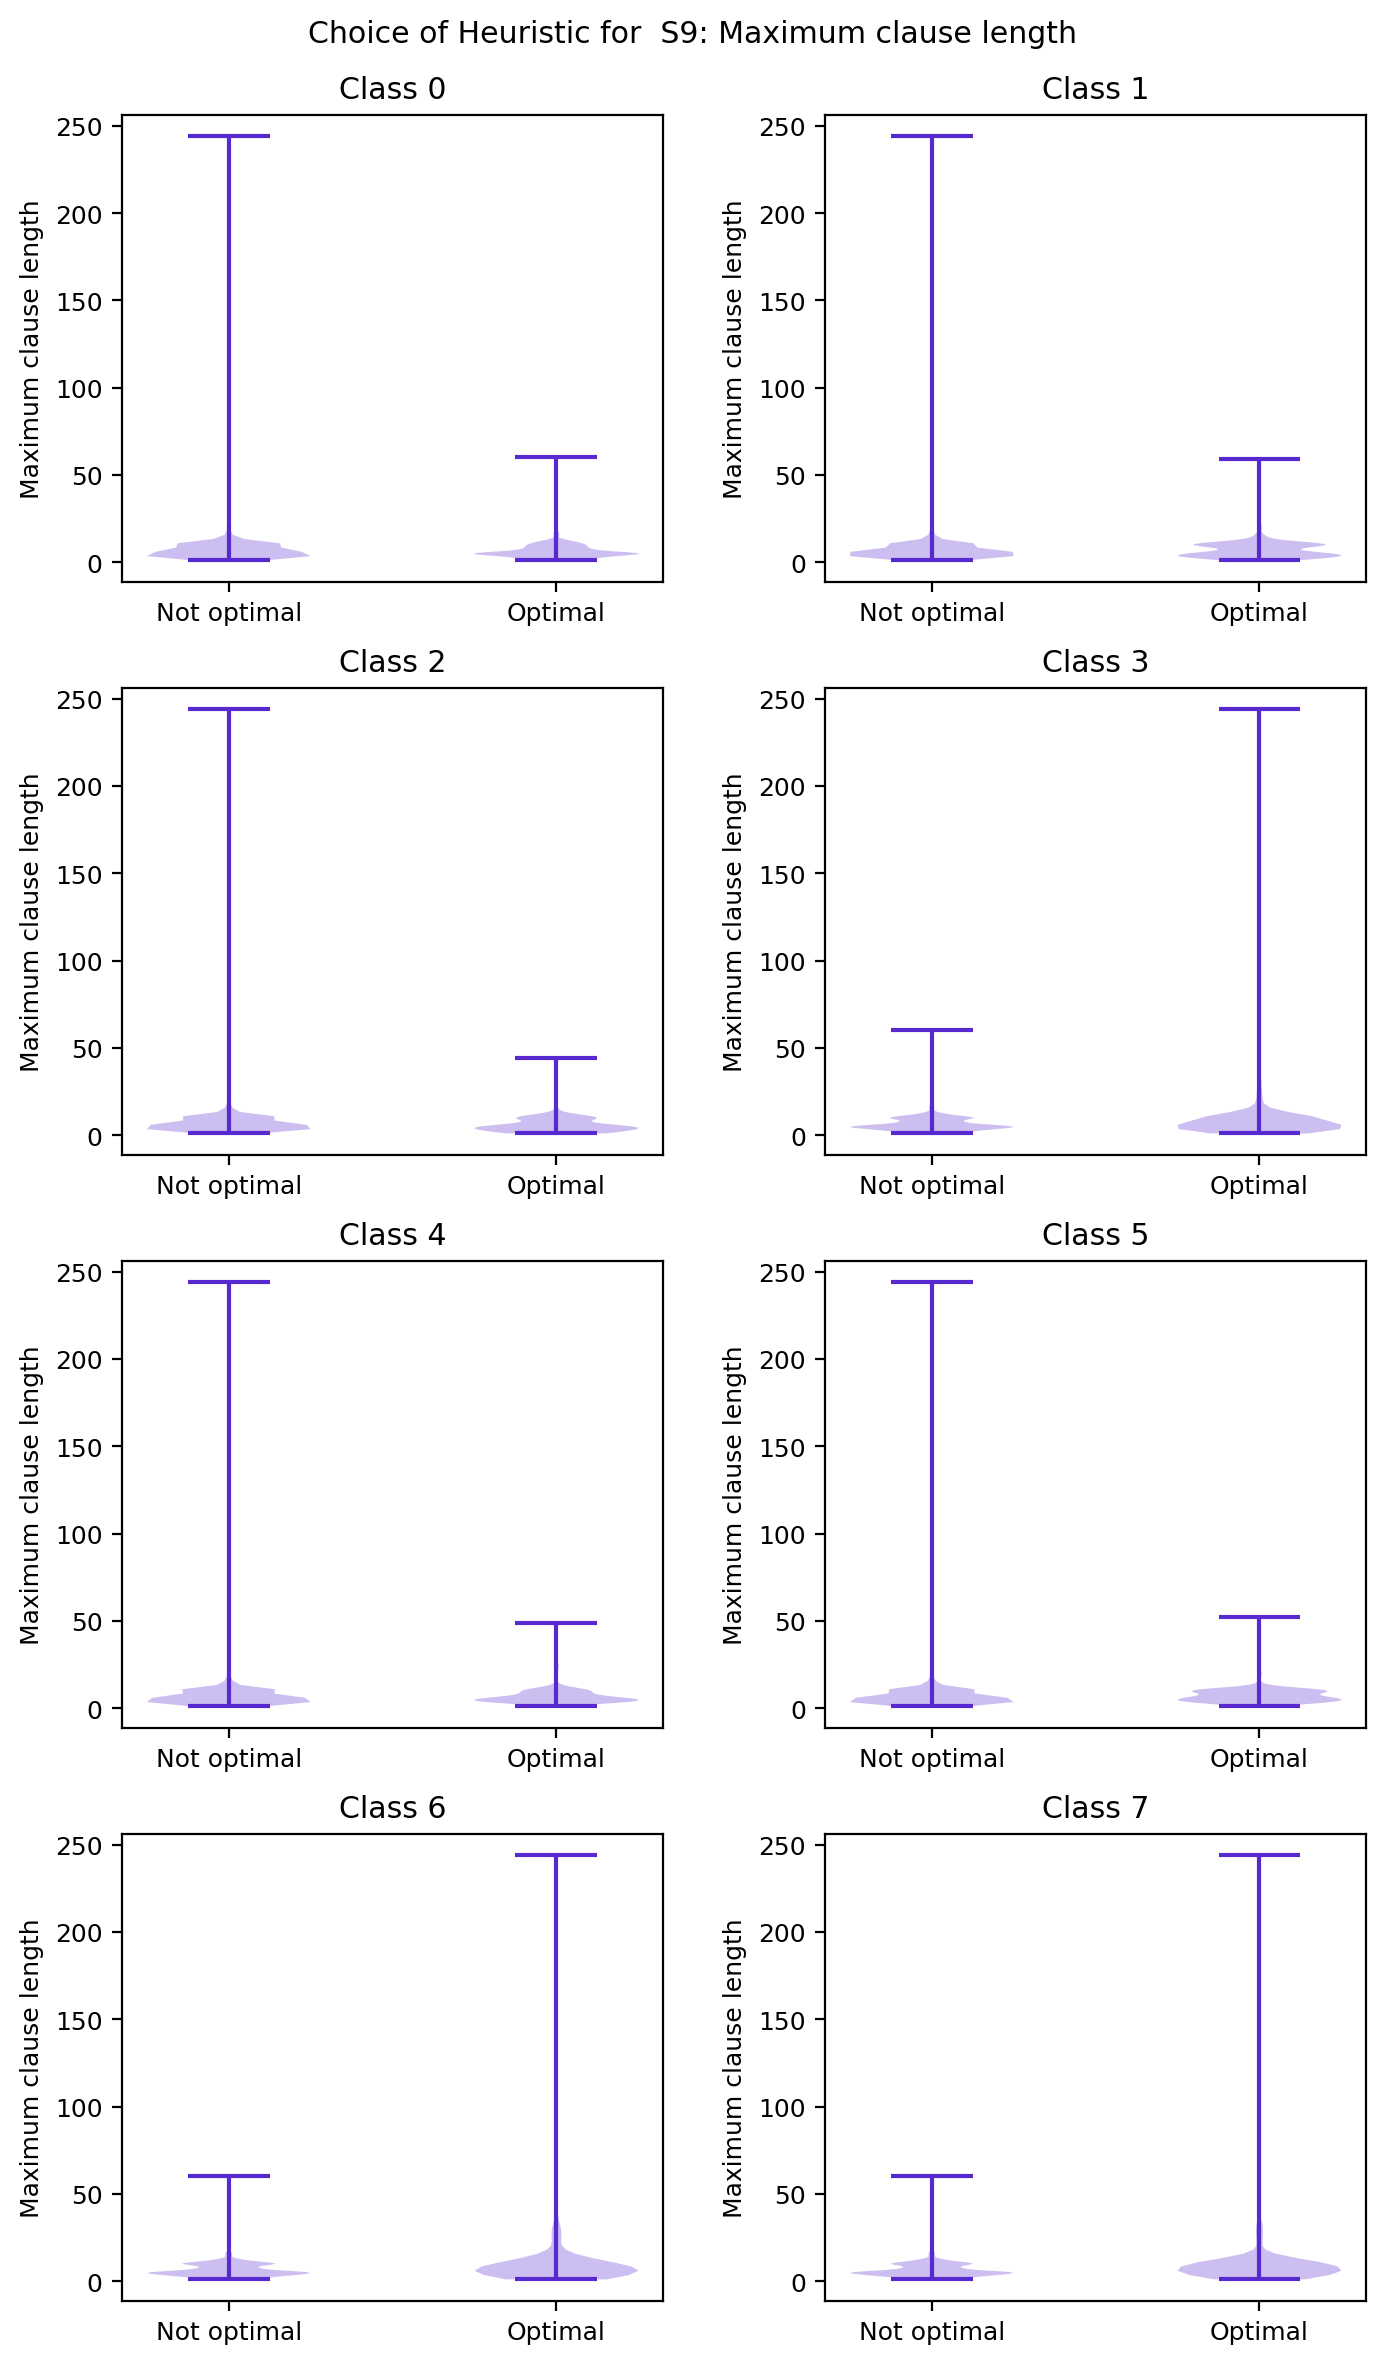

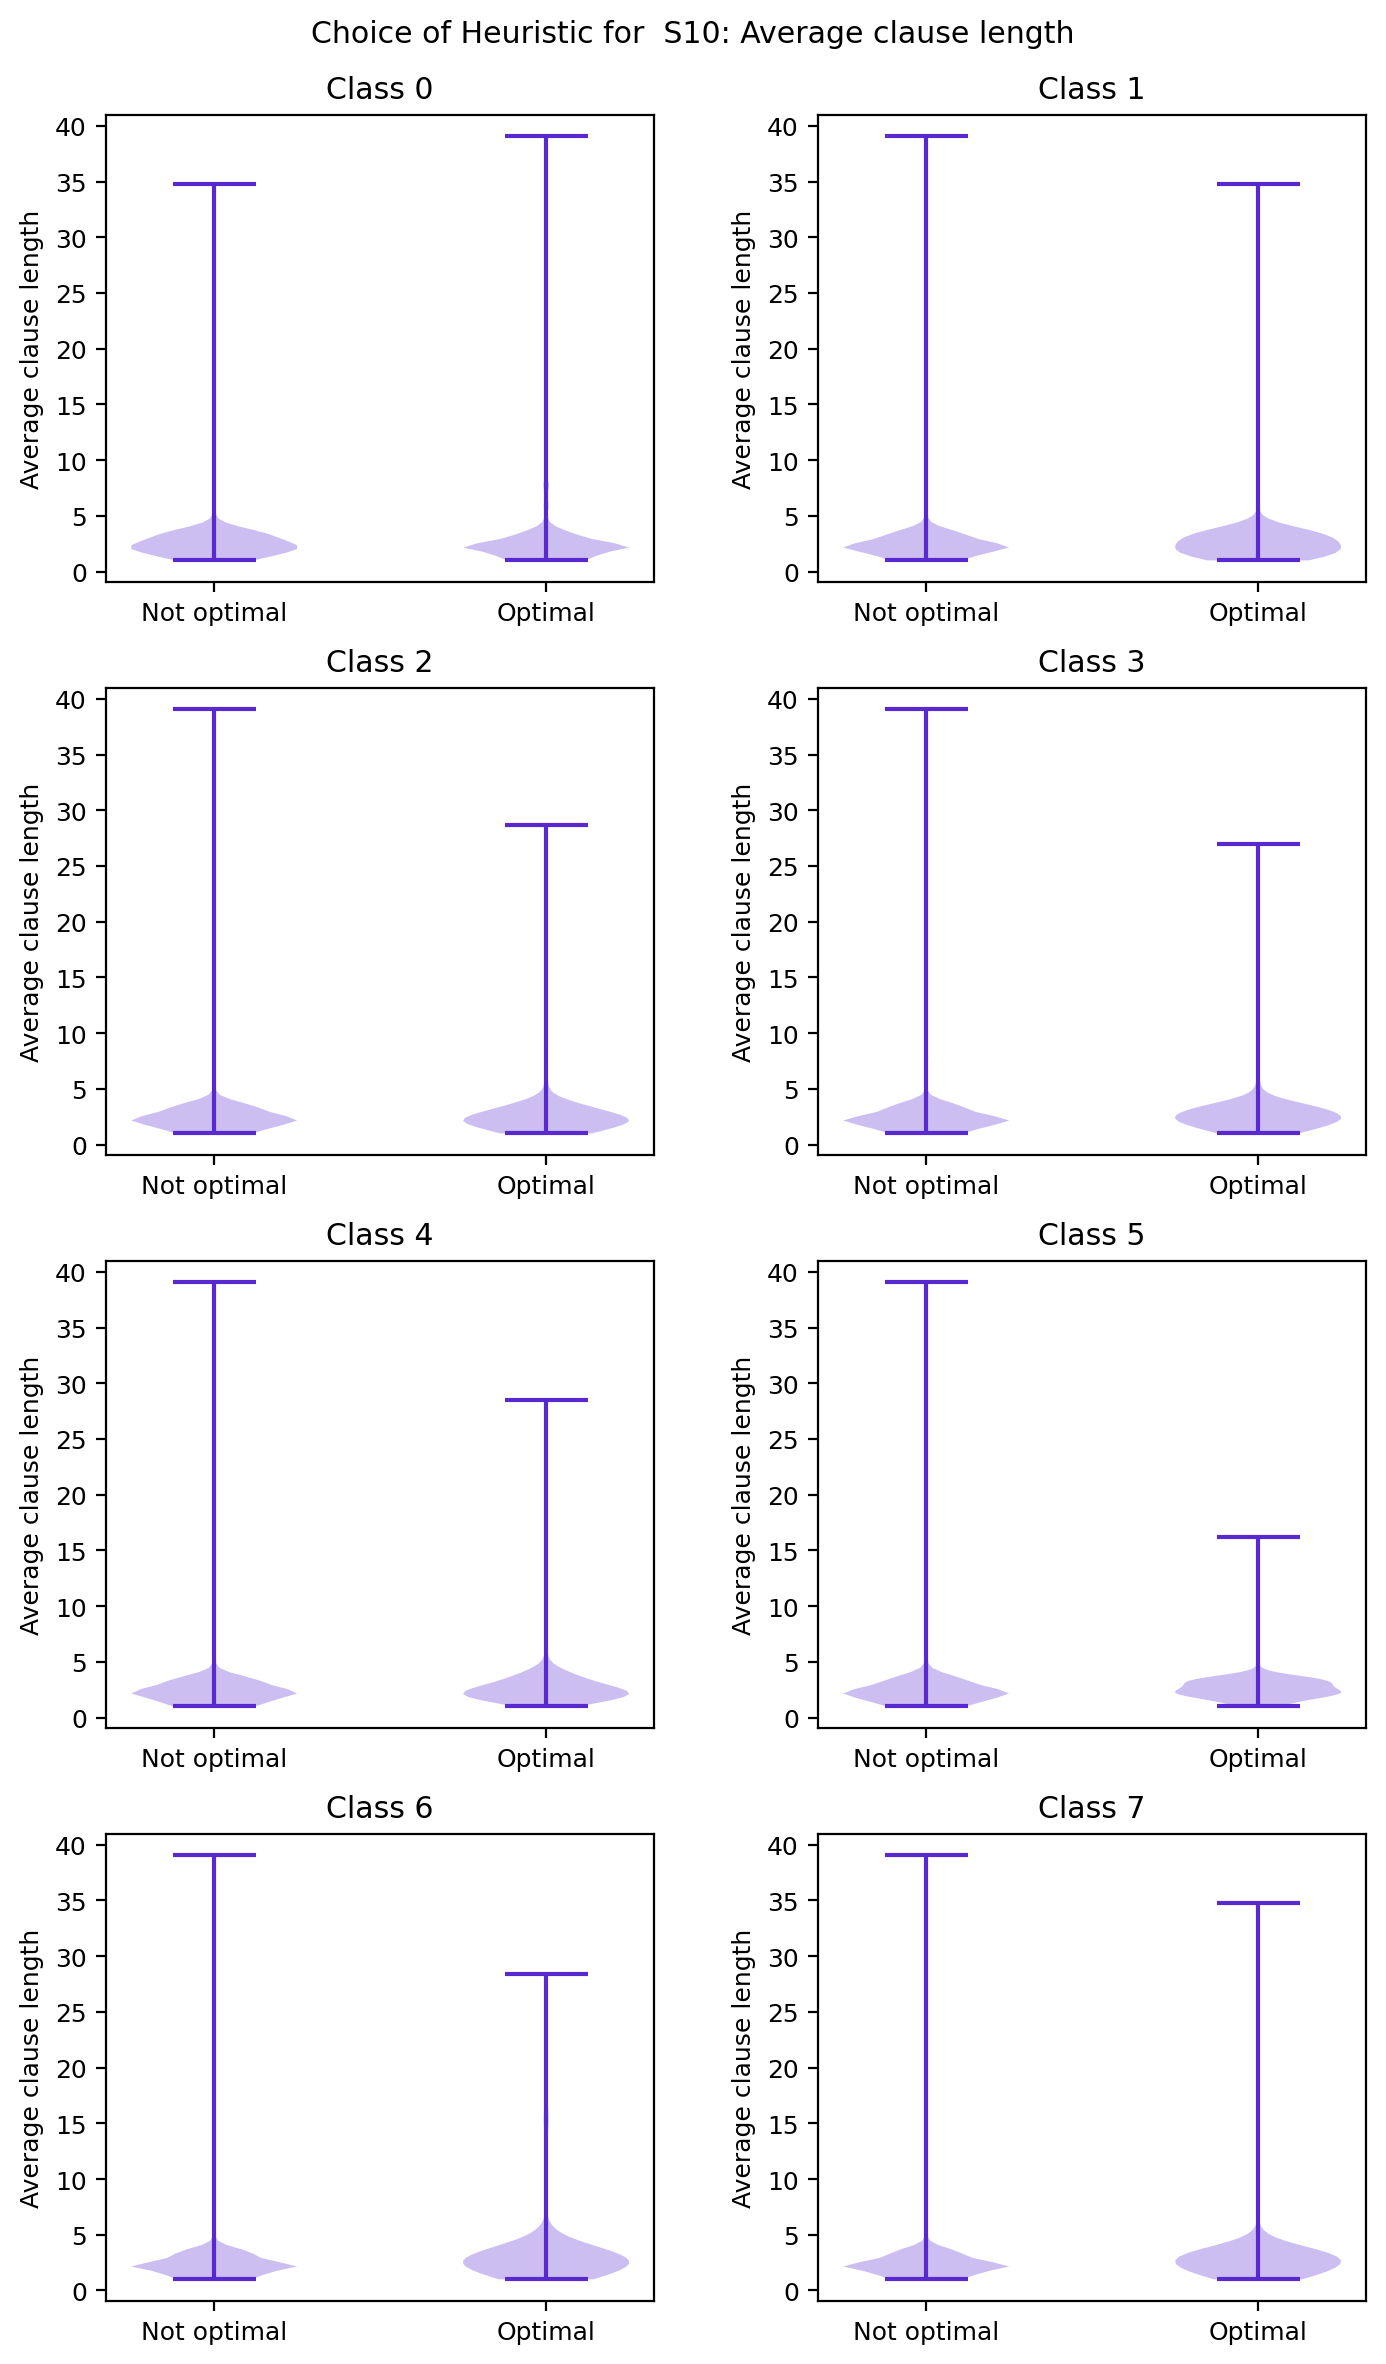

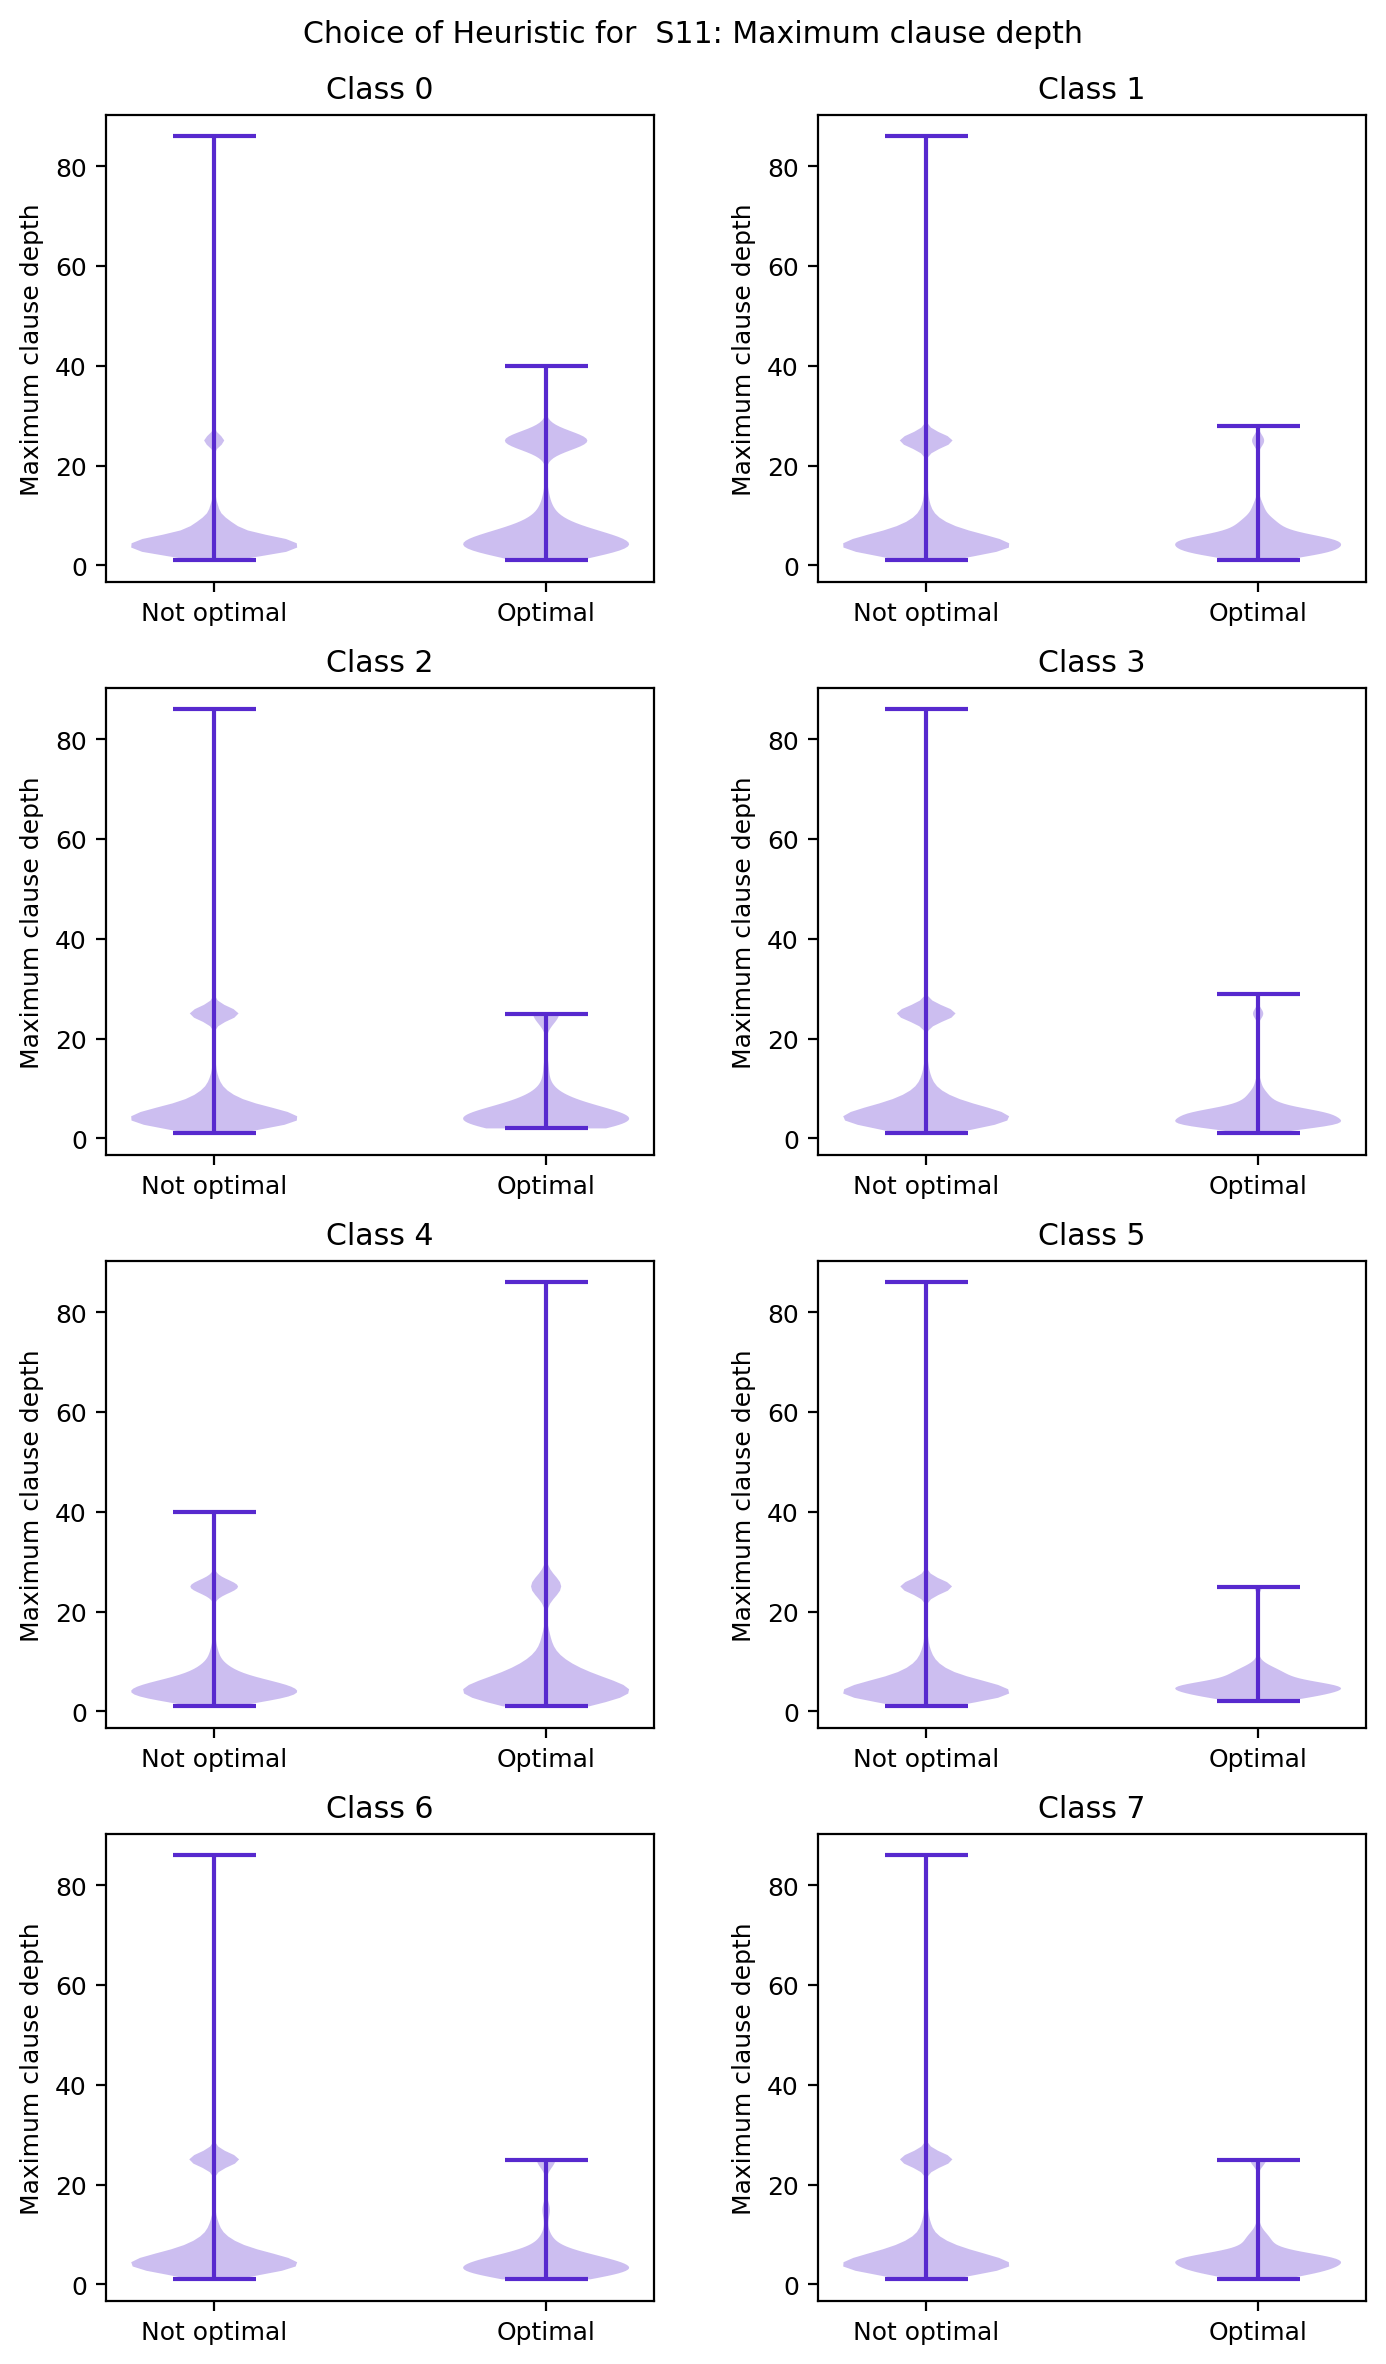

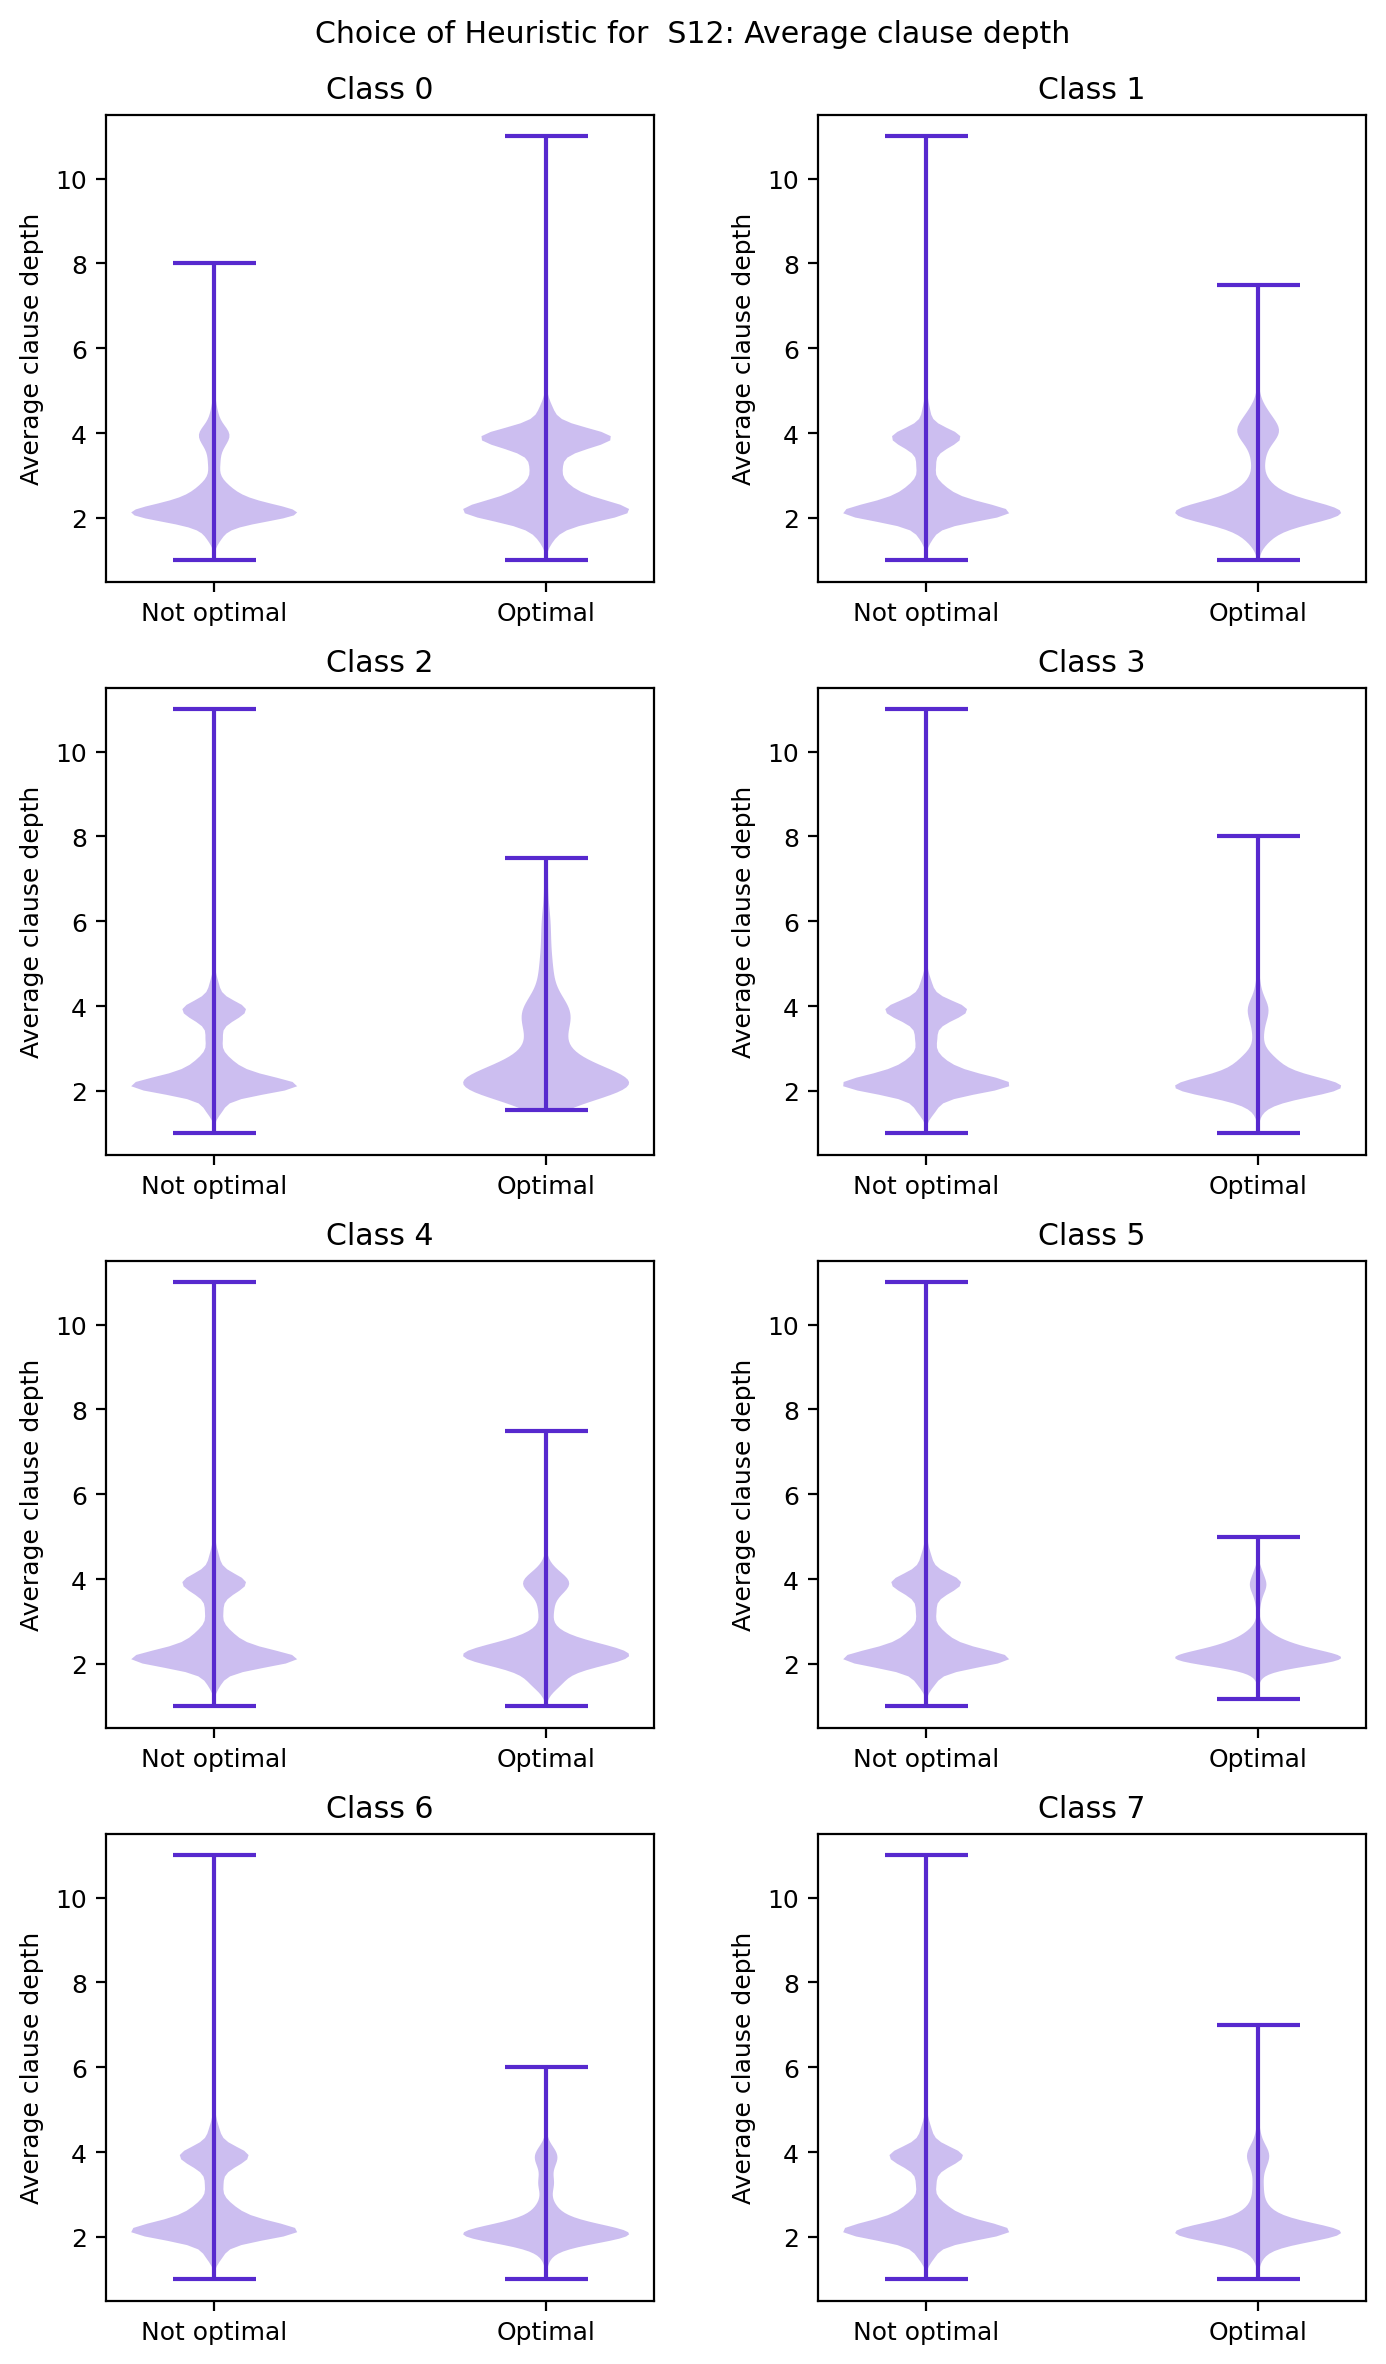

KeyboardInterrupt: 

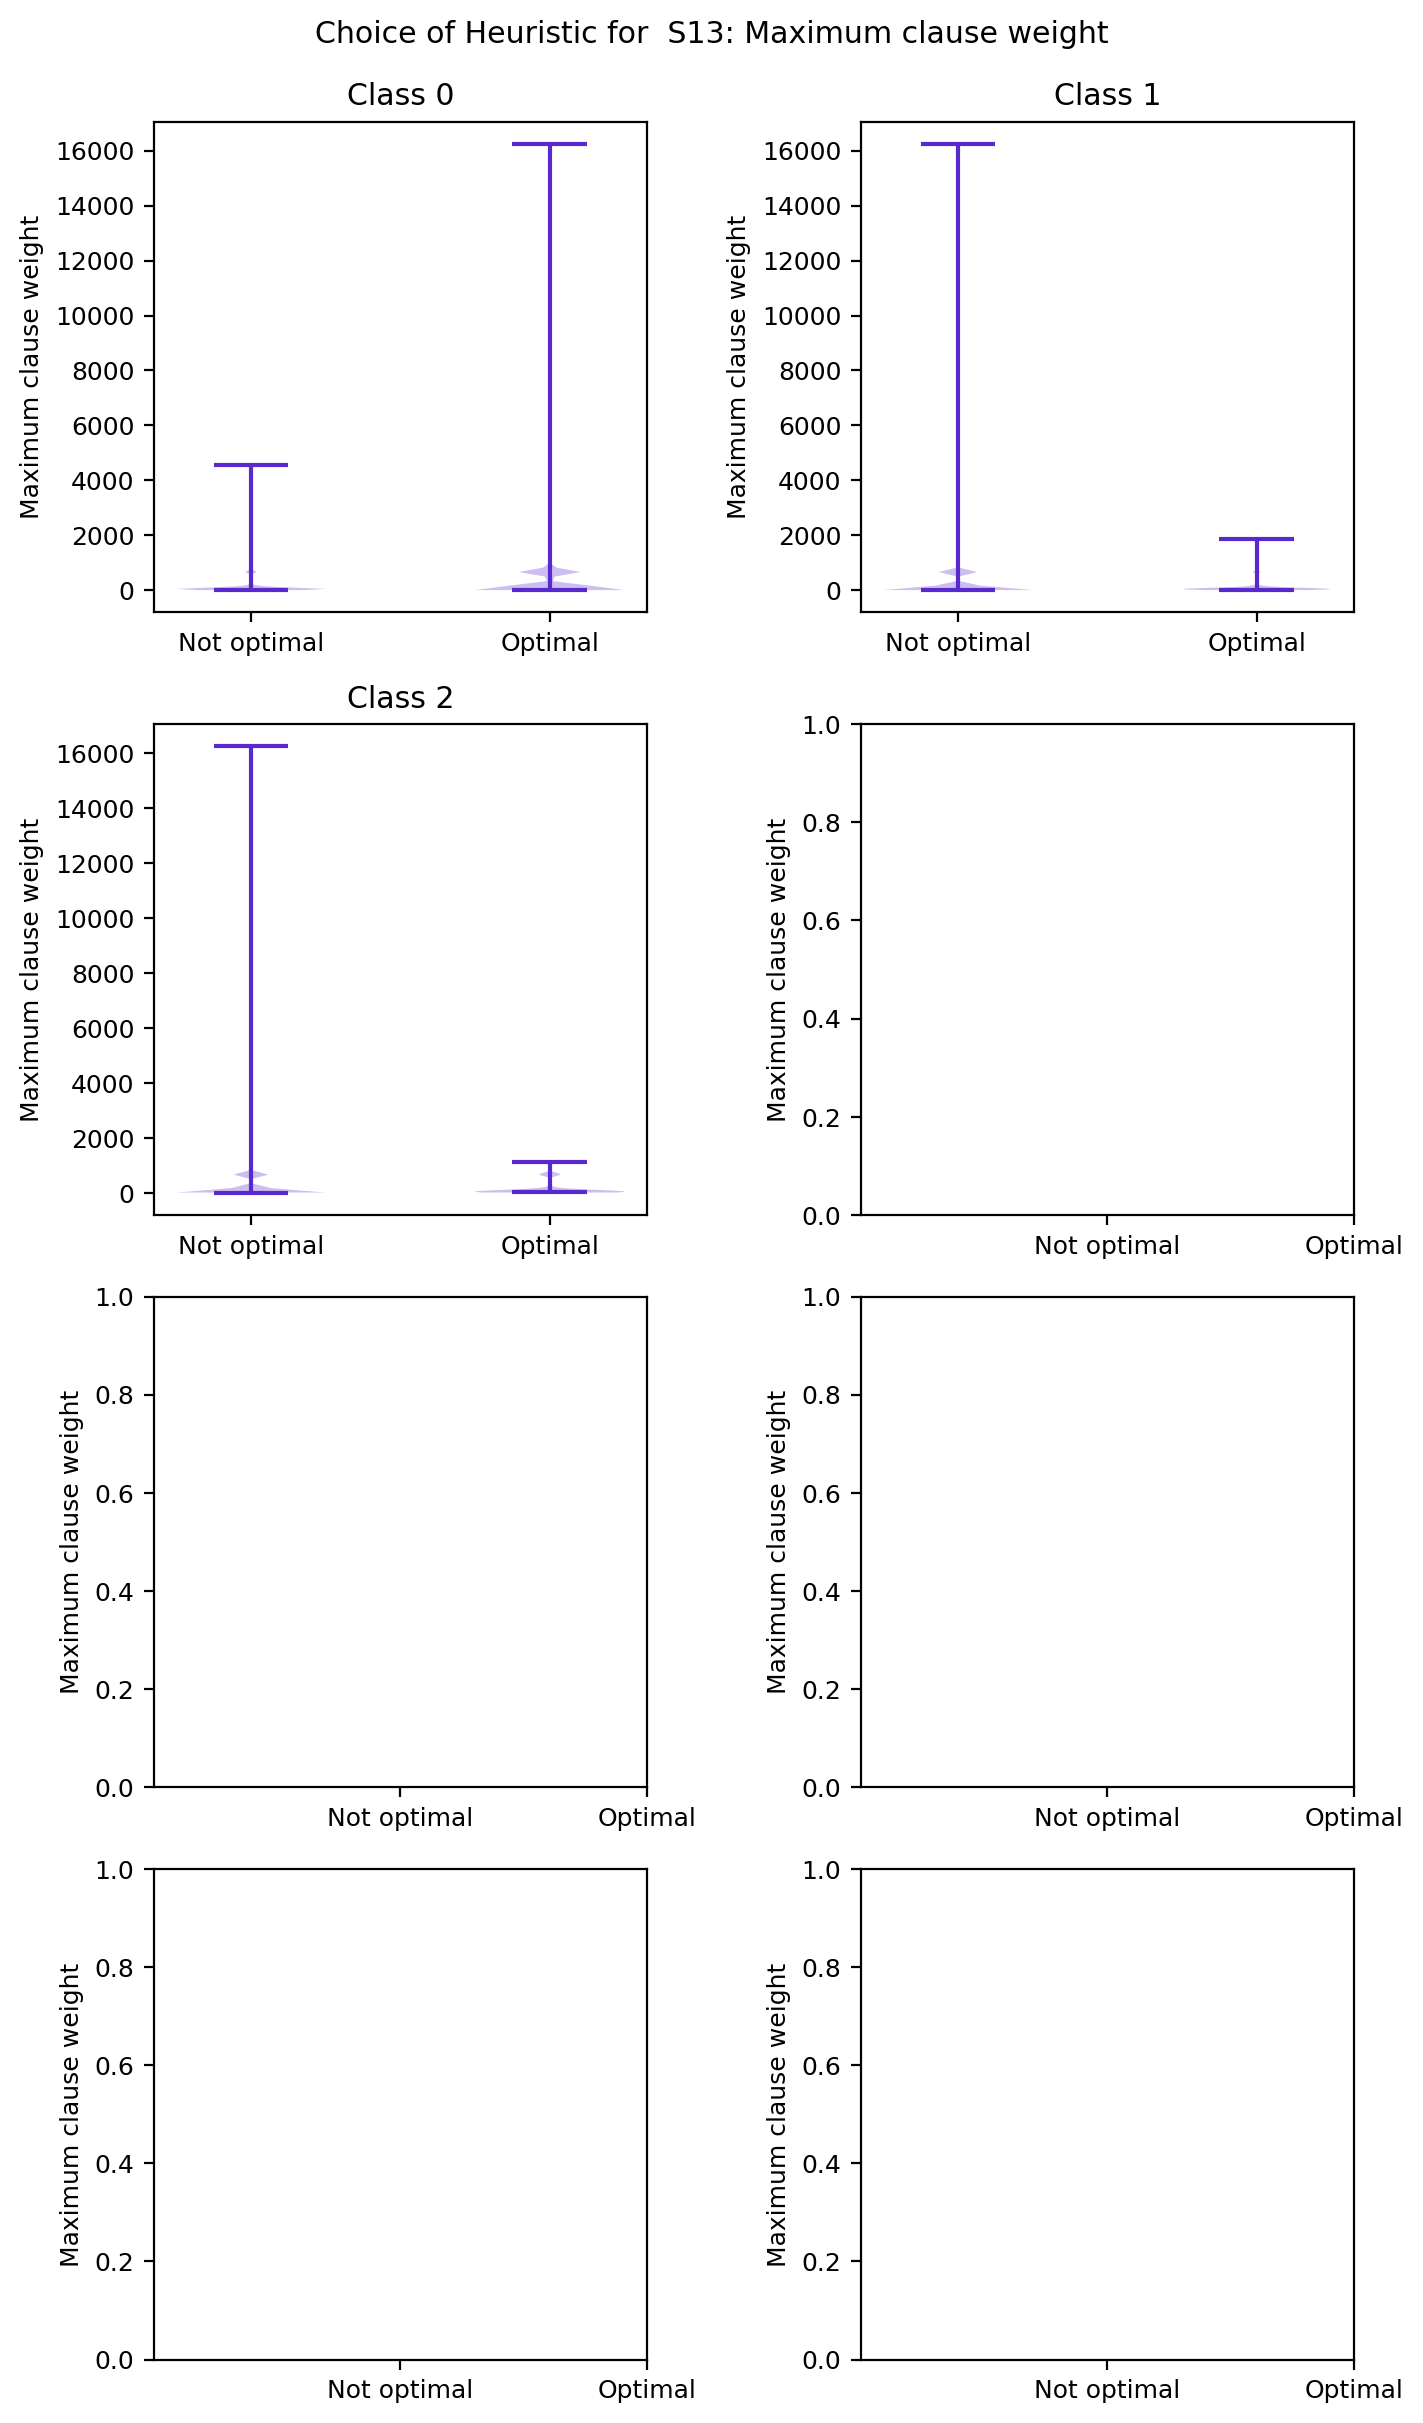

In [66]:
H_index = [0,1,2,3,4,5,6,7]
H_index = get_unique_combos()
df = pd.read_csv('../data/multilabel_modified_classes.csv')
target_cols = ['Class ' + str(i) for i in range(8)]
plt.rcParams['font.size'] = 9
plt.rcParams['figure.dpi'] = 200
for var2 in df[features.index].columns:
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7, 12)) 
    description = features.loc[var2,'Description']
    plt.setp(axes, xticks=[1,2], xticklabels=['Not optimal','Optimal'], ylabel = description)
    fig.suptitle('Choice of Heuristic for  {}: {}'.format(var2, description))
    for ax, var1, idx in zip(axes.flatten(), df[target_cols].columns, H_index):
        datasubset = [df[df[var1] == 0][var2].values, df[df[var1] == 1][var2].values]
        parts = ax.violinplot(dataset = datasubset)
        for pc in parts['bodies']:
            pc.set_facecolor('xkcd:blue purple')
            pc.set_facecolor('xkcd:blue purple')
        parts['cmins'].set_color('xkcd:blue purple')
        parts['cmaxes'].set_color('xkcd:blue purple')
        parts['cbars'].set_color('xkcd:blue purple')
        ax.set(title='Class ' + str(idx))
    fig.tight_layout()
    fig.subplots_adjust(top=0.94, wspace = 0.3)
  #  if var2 in plots_to_save:
  #      figname = '../figures/violinplot_heuristics_by_variable' + var2 + '.png'
 #       plt.savefig(figname, dpi=300, format='png')
    plt.show()  